This notebook contains the code for the results and plots presented in `Tanking from the Start: Dynamic Moral Hazard with a Change in Preference'. As mentioned in the paper, the following analysis is done using the cost of effort function $c(e) = e^2$. 

In [1]:
from scipy.optimize import minimize 
from sympy import *
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={"figure.dpi":300, 'savefig.dpi':300})
sns.set_context('notebook')
sns.set_style("ticks")

### Useful functions 

The following section contains a list of functions that will be used in the analysis later. 

\begin{align*}
c(e) &= e^2 \\
c'(e) &= 2e \\
\text{Rent to the agent for effort} \ e :  A(e) &= ec'(e) - c(e)\\
\text{Transfer to the agent in the first-period}: t_1(e_1, e_2(0), e_2(1)) &= c'(e_1)-A(e_2(1))+A(e_2(0)) \\
\text{Transfer to the agent in the second-period}: t_2(e_2) &= c'(e_2) \\
\text{First-best in the benchmark problem}: e^{FB} &= 0.5 \\
\text{Second-best in the becnhmark problem}: e^{SB} &= 0.25
\end{align*}

In [2]:
# Cost function 

def c(e):
    return e**2

# First derivative of the cost function 

def c_e(e):
    return 2*e

# Rent to the agent 

def A(e):
    return e*c_e(e)-c(e)

# Transfer in the first period 

def t_1(e1, e20, e21):
    return c_e(e1)-A(e21)+A(e20)

# Transfer in the second period

def t_2(e):
    return c_e(e)

# Total rent to the agent

def total_A(e1, e20):
    return A(e1)+A(e20)

# Probability grid 

n = 25 # number of grid points
p_grid = np.linspace(0, 1, n)

### Some useful effort levels:

In [3]:
# Static first-best 

e_fb = 1/2 

# Static second-best

e_sb = 1/4

# Static first-best with the change in preference 

ep_fb = (1-p_grid)/2

# Static second-best with the change in preference

ep_sb = (1-p_grid)/4

## 3.2 Two-period Benchmark Model

The principal maximizes: 

$$e_1(1-t_1(1)+e_2(1)(1-t_2(1,1)))+(1-e_1)(-t_1(0)+e_2(0)(1-t_2(0,1)))$$

subject to 

\begin{align*}
    t_1(1) \geq 0 \qquad &(LL_1) \\
    t_1(0) \geq 0 \qquad &(LL_0) \\
    t_1(1)+A(e_2(1)) = a(1) \qquad &  \\
    t_1(0) + A(e_2(0)) = a(0) \qquad & \\
    a(1) - a(0) = c'(e_1) \qquad &(IC_1) \\
    t_2(y_1,1) = c'(e_2(y_1)) \qquad & (IC_2)
\end{align*}

The problem simplifies to: 

$$\max_{e_1, e_2(0), e_2(1), t_1(0)} e_1-2e_1^2+e_1(e_2(1)-e_2(1)^2)+(1-e_1)(e_2(0)-e_2(0)^2)-t_1(0)-e_2^2(0) $$ 

subject to 

$$t_1(0) \geq 0$$ 

Therefore, the Lagrangian is given by: 

$$L = e_1-2e_1^2+e_1(e_2(1)-e_2(1)^2)+(1-e_1)(e_2(0)-e_2(0)^2)-t_1(0)-e_2^2(0)+\lambda(t_1(0))$$

The first-order conditions that characterize the optimal solution are: 

$$ [e_1]: \ 1-4e_1+e_2(1)-e_2(1)^2-e_2(0)+e_2(0)^2= 0$$

$$[e_2(0)]: \ (1-e_1)-2(1-e_1)e_2(0)-2e_2(0) =0$$

$$[e_2(1)]: \ e_1+2e_1e_2(1) = 0 \implies e_2(1) = \frac{1}{2} = e^{FB}$$

$$[t_1(0)]: \ -1+\lambda = 0 \implies \lambda = 1 \implies t_1(0) = 0$$

In [4]:
# Solves for the effort levels

# a = e_1, b = e_20

var('a b')
eqns = [1-4*a+0.25-b+b**2, (1-a)-2*(1-a)*b-2*b]
soln = solve(eqns, [a,b])

e1_B = abs(soln[0][0])
e20_B = abs(soln[0][1])

## 3.3 *Win from Losing*

The principal maximizes 

$$[e_1(1-t_1(1)+e_2(1)(1-t_2(1,1))+(1-e_1)(-t_1(0)+e_2(0)(1-p-t_2(0,1))+p)$$

subject to 

\begin{align*}
    t_1(1) \geq 0 \qquad &(LL_1) \\
    t_1(0) \geq 0 \qquad &(LL_0) \\
    t_1(1)+A(e_2(1)) = a(1) \qquad & \\
    t_1(0) + A(e_2(0)) = a(0) \qquad &\\
    a(1) - a(0) = c'(e_1) \qquad &(IC_1) \\
    t_2(y_1,1) = c'(e_2(y_1)) \qquad & (IC_2)
\end{align*}

The problem reduces to the following: 

$$ \max_{e_1, e_2(0), e_2(1), t_1(0)} e_1(1-e_2(1)^2+e_2(1))+(1-e_1)(-e_2(0)^2+e_2(0)(1-p)+p)-2e_1^2-t_1(0)-e_2(0)^2$$

subject to 

$$t_1(0) \geq 0$$

The Lagrangian is then given by: 

$$L = e_1(1-e_2(1)^2+e_2(1))+(1-e_1)(-e_2(0)^2+e_2(0)(1-p)+p)-2e_1^2-t_1(0)-e_2(0)^2 +\lambda (t_1(0))$$

The first-order conditions that characterize the optimal solution are: 

\begin{align*}
[e_2(1)] :\ &-2e_2(1)e_1+e_1 = 0 \implies e_2(1) = \frac{1}{2} \\
\\
[e_2(0)] :\  & -2(1-e_1)e_2(0)+(1-e_1)(1-p)-2e_2(0) = 0\\
\\
[e_1] :\ & (1+0.25)-4e_1+e_2(0)^2-e_2(0)(1-p)-p = 0 \\
\\
[t_1(0)]: \ &-1+\lambda = 0 \implies \lambda = 1 \implies t_1(0) = 0
\end{align*}

In [5]:
def f_dep_1(p):
    
    # solves for effort levels e_1 and e_20 as a function of p
    
    # a = e_1, b = e_20 
    
    var('a b p')
    eqns = [1+0.25-4*a+b**2-b*(1-p)-p, -2*b*(1-a)+(1-a)*(1-p)-2*b]
    soln = solve(eqns, [a,b])
    return soln

In [6]:
# Effort levels

e1_dep_1 = list()
e20_dep_1 = list()

for i in range(len(p_grid)):
    
        # No unique solution to the simultaneous equations
        
        # We pick the real solutions between 0 and 1 below
        
        e1_dep_1.append(abs(f_dep_1(p_grid[i])[0][0]))
        e20_dep_1.append(abs(f_dep_1(p_grid[i])[0][1]))        

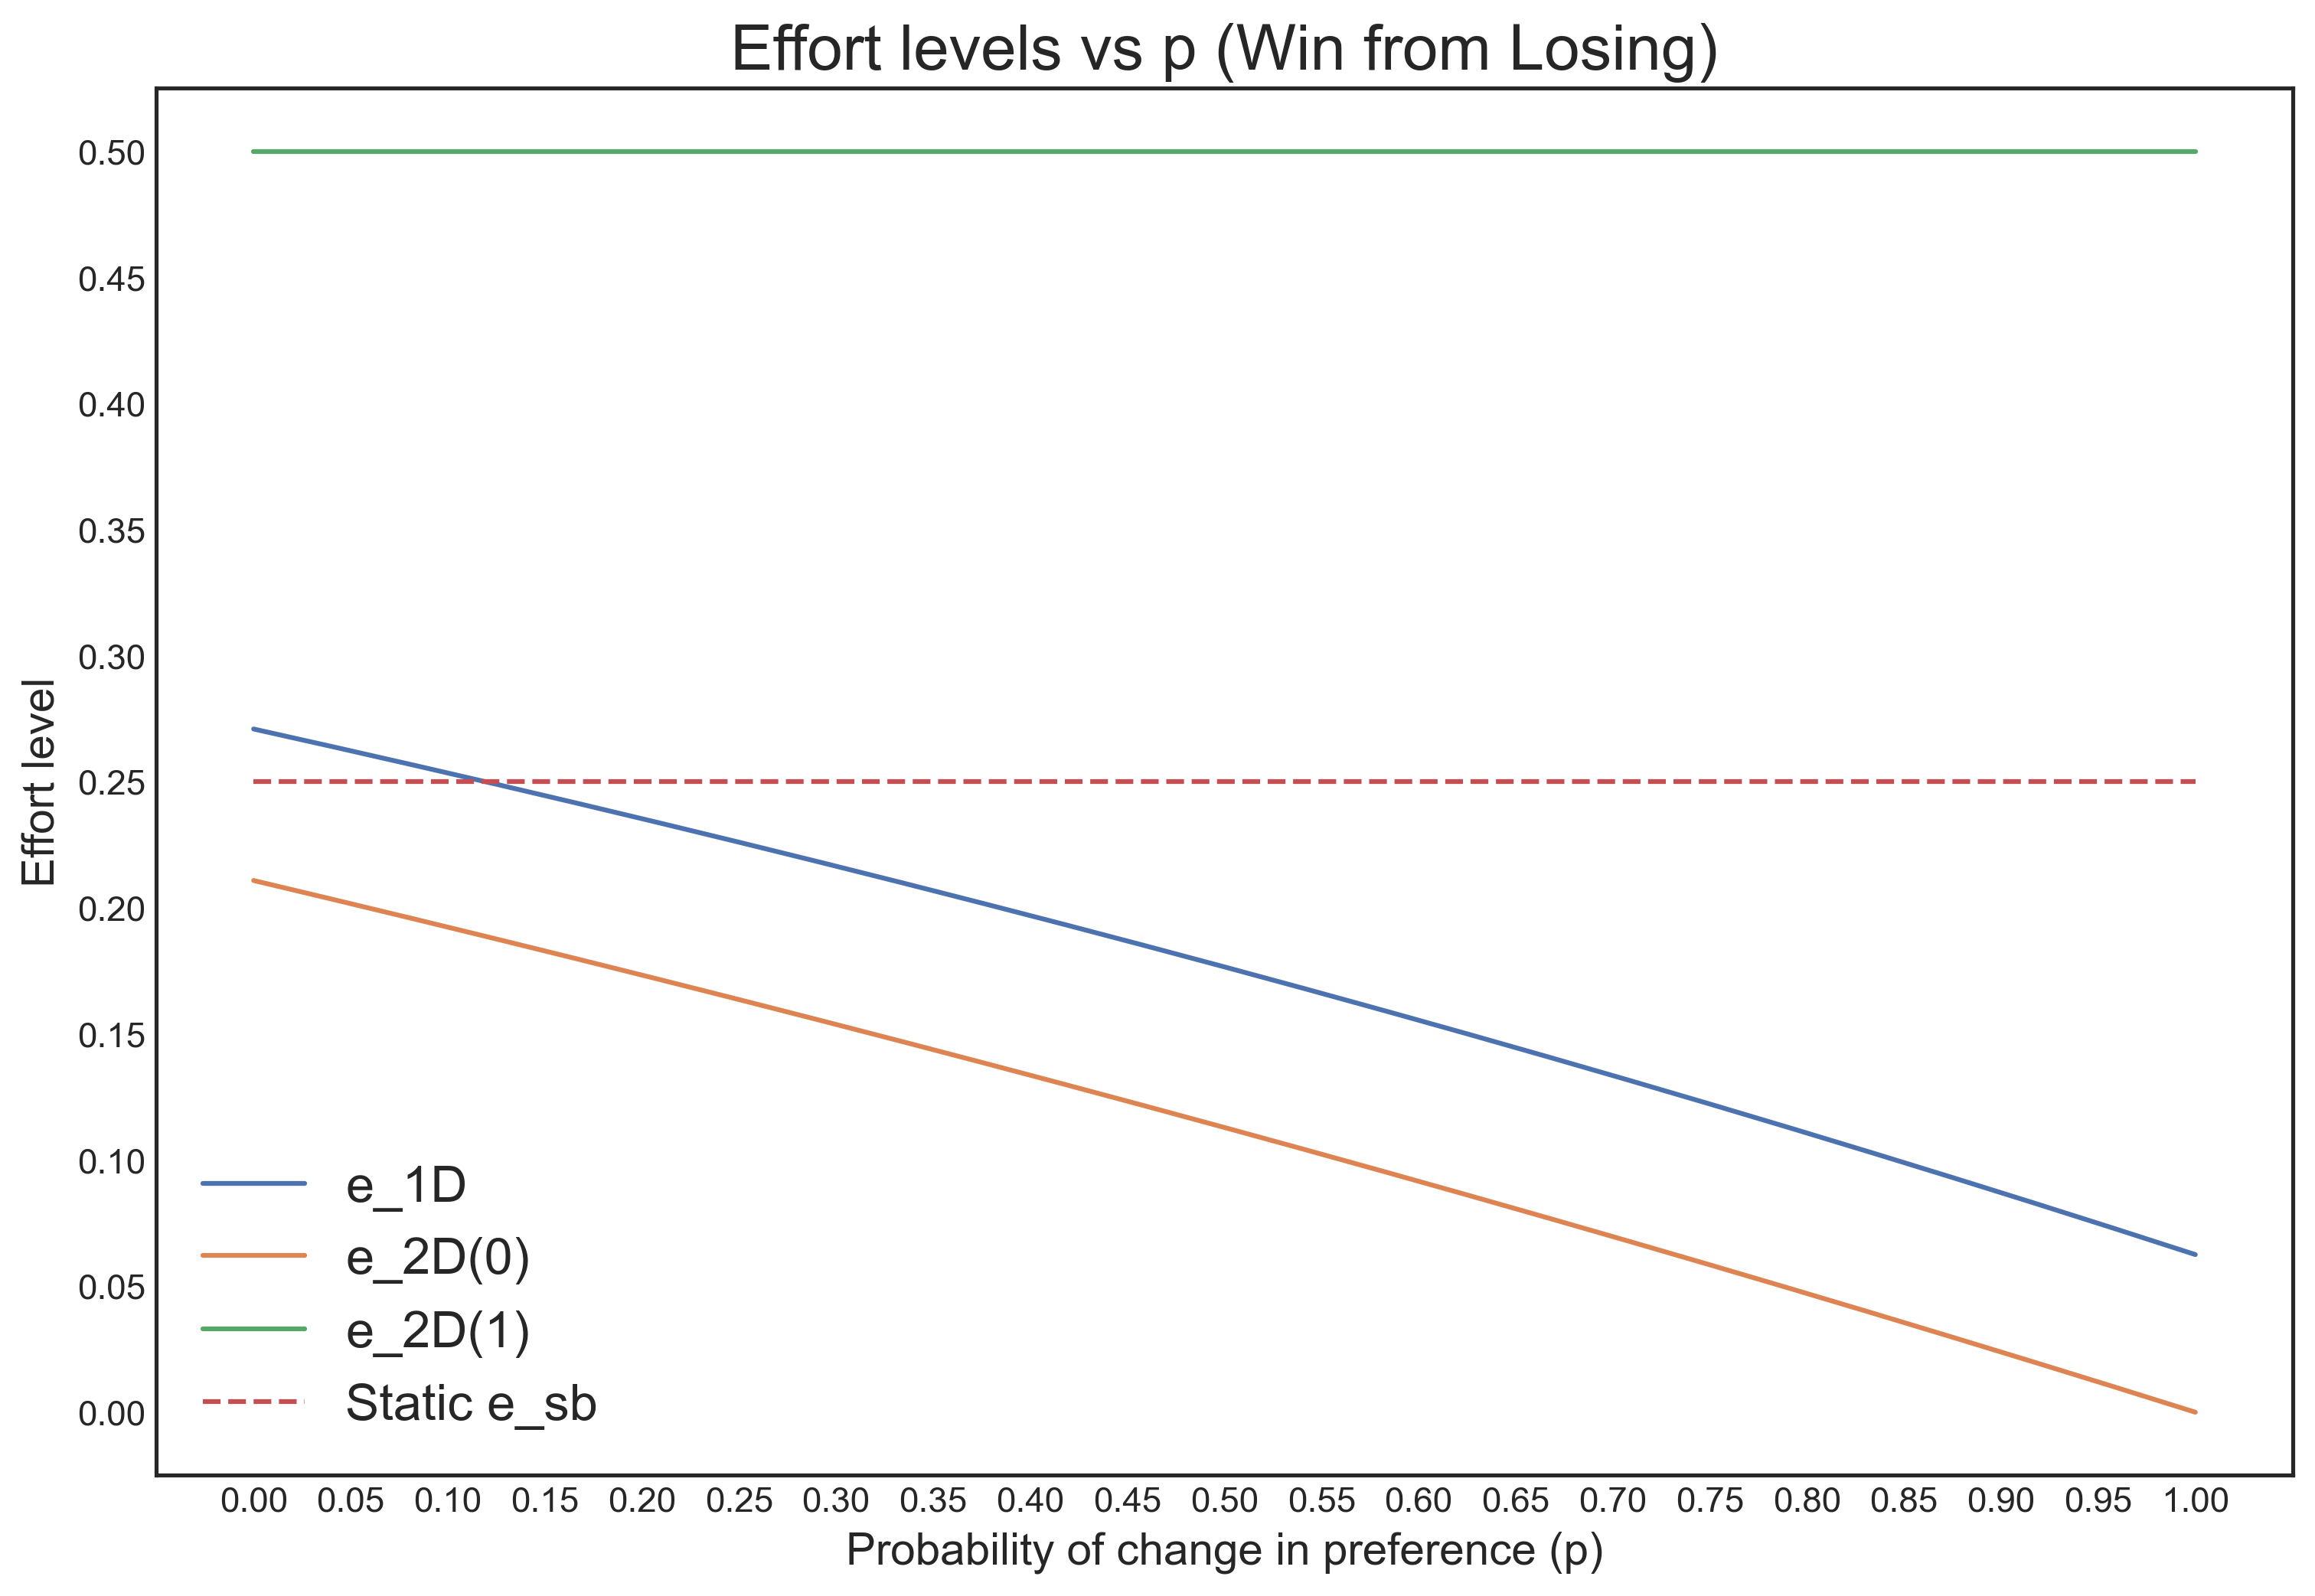

In [7]:
# Plotting the effort levels 

plt.figure(figsize=(12,8))
plt.style.use('seaborn-white')
plt.plot(p_grid, e1_dep_1, label = "e_1D")
plt.plot(p_grid, e20_dep_1, label = "e_2D(0)")
plt.plot(p_grid, [e_fb]*len(p_grid), label = "e_2D(1)")
plt.plot(p_grid, [e_sb]*len(p_grid), '--',label = "Static e_sb")
plt.xticks([0, 0.05, 0.10, 0.15, 0.20, 0.25, 0.30, 0.35, 0.40, 0.45, 0.50, 0.55, 0.60, 0.65, 0.70, 0.75, 0.80, 0.85, 0.90,0.95,1.00])
plt.yticks([0, 0.05, 0.10, 0.15, 0.20, 0.25, 0.30, 0.35, 0.40, 0.45, 0.50])
plt.legend(loc=3, prop={'size': 16})
plt.xlabel('Probability of change in preference (p)', fontname = 'Arial', fontsize = 14)
plt.ylabel('Effort level', fontname='Arial', fontsize = 14)
plt.title('Effort levels vs p (Win from Losing)', fontsize = 20)
plt.show()

### 3.3.1 Comparison of Contracts

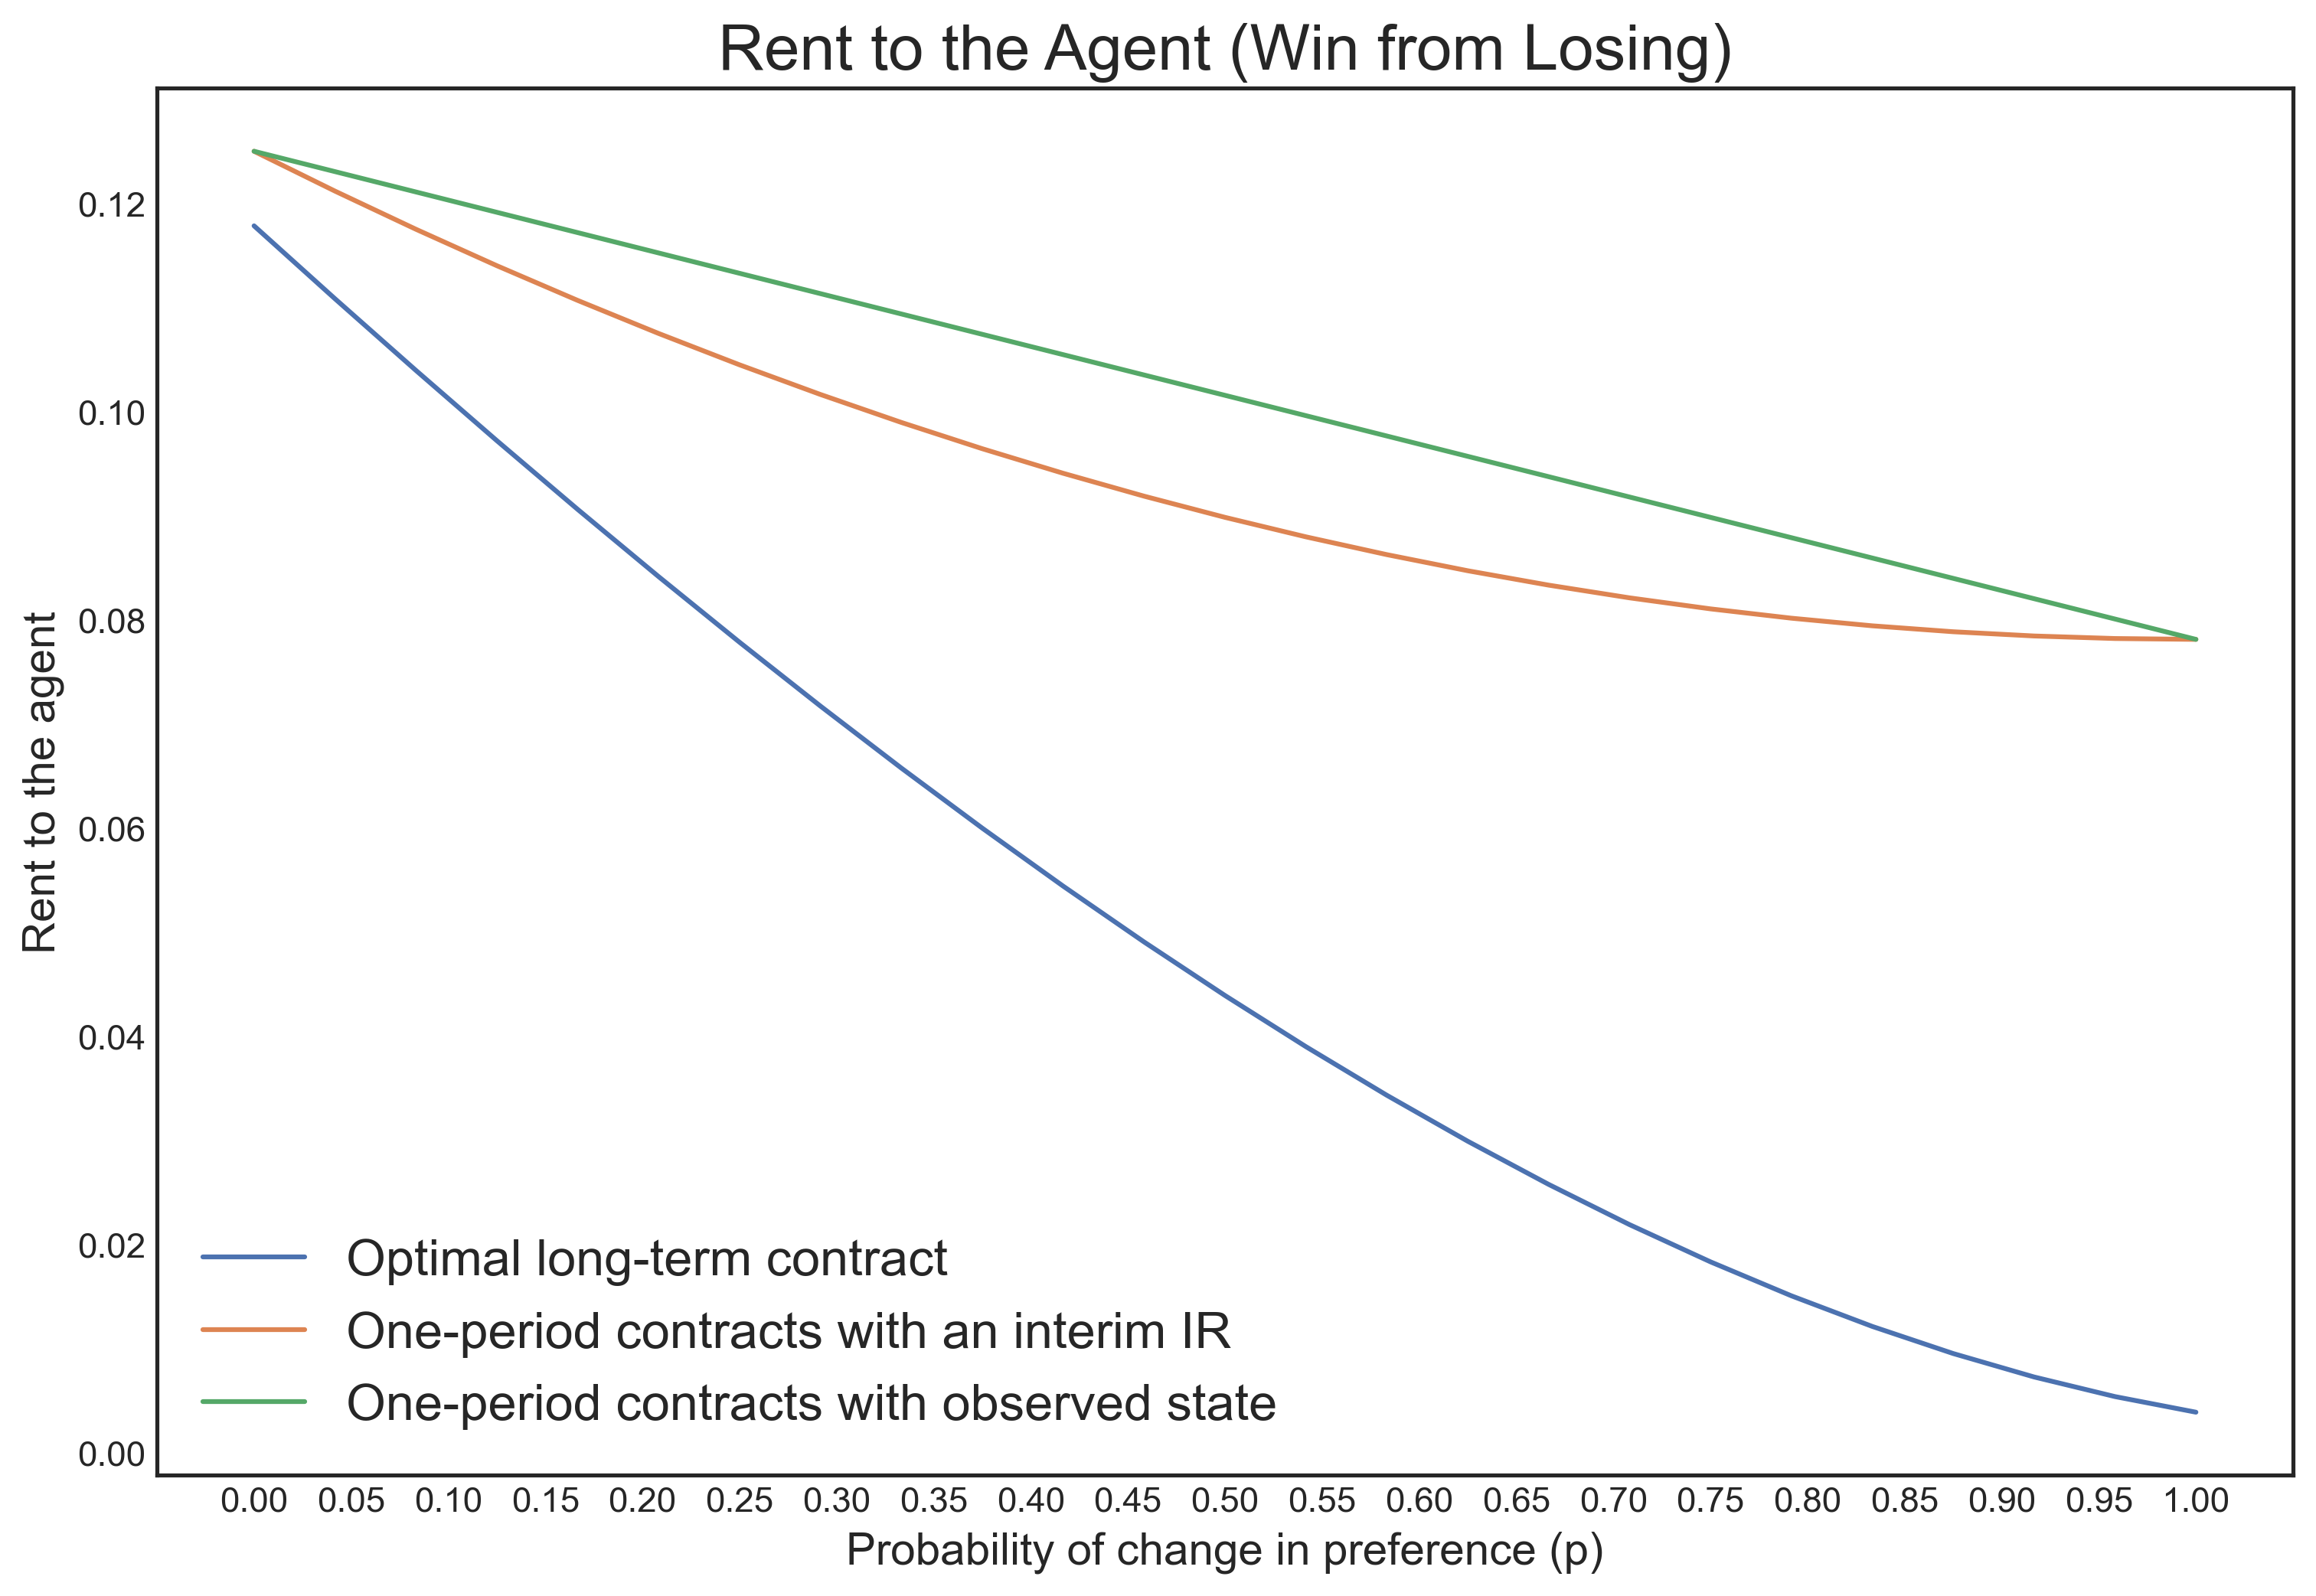

In [8]:
# Comparison of rents to the agent

# 1. Optimal long-term contract rent 

long_grid = list()

# 2. One-period contracts with interim IR rent

repeated_IR_grid = list()

# 3. One-period contracts with realized state rent

realized_grid = list()


for i in range(len(p_grid)):
    e1= e1_dep_1[i]
    e20 = e20_dep_1[i]
    e21 = e_fb
    p = p_grid[i]
    e_sb_p = ep_sb[i]
    
    # 1. Optimal long-term contract
    
    long_grid.append(A(e1)+A(e20))
    
    # 2. One-period contracts with interim IR
    
    repeated_IR_grid.append(A(e_sb)+e_sb*A(e_sb)+(1-e_sb)*A(e_sb_p))
    
    # 3. One-period contracts. One-period contract with interim IR rent  with realized state
    
    realized_grid.append(A(e_sb)+(1-p*(1-e_sb))*A(e_sb))
    
# Plotting the rents 

plt.figure(figsize=(12,8))
plt.plot(p_grid, long_grid, label = "Optimal long-term contract")
plt.plot(p_grid, repeated_IR_grid, label = "One-period contracts with an interim IR")
plt.plot(p_grid, realized_grid, label = "One-period contracts with observed state")
plt.xticks([0, 0.05, 0.10, 0.15, 0.20, 0.25, 0.30, 0.35, 0.40, 0.45, 0.50, 0.55, 0.60, 0.65, 0.70, 0.75, 0.80, 0.85, 0.90, 0.95, 1.00])
plt.legend(loc=3, prop={'size': 16})
plt.xlabel('Probability of change in preference (p)', fontname = 'Arial', fontsize = 14)
plt.ylabel('Rent to the agent', fontname='Arial', fontsize = 14)
plt.title('Rent to the Agent (Win from Losing)', fontsize = 20)
plt.show()

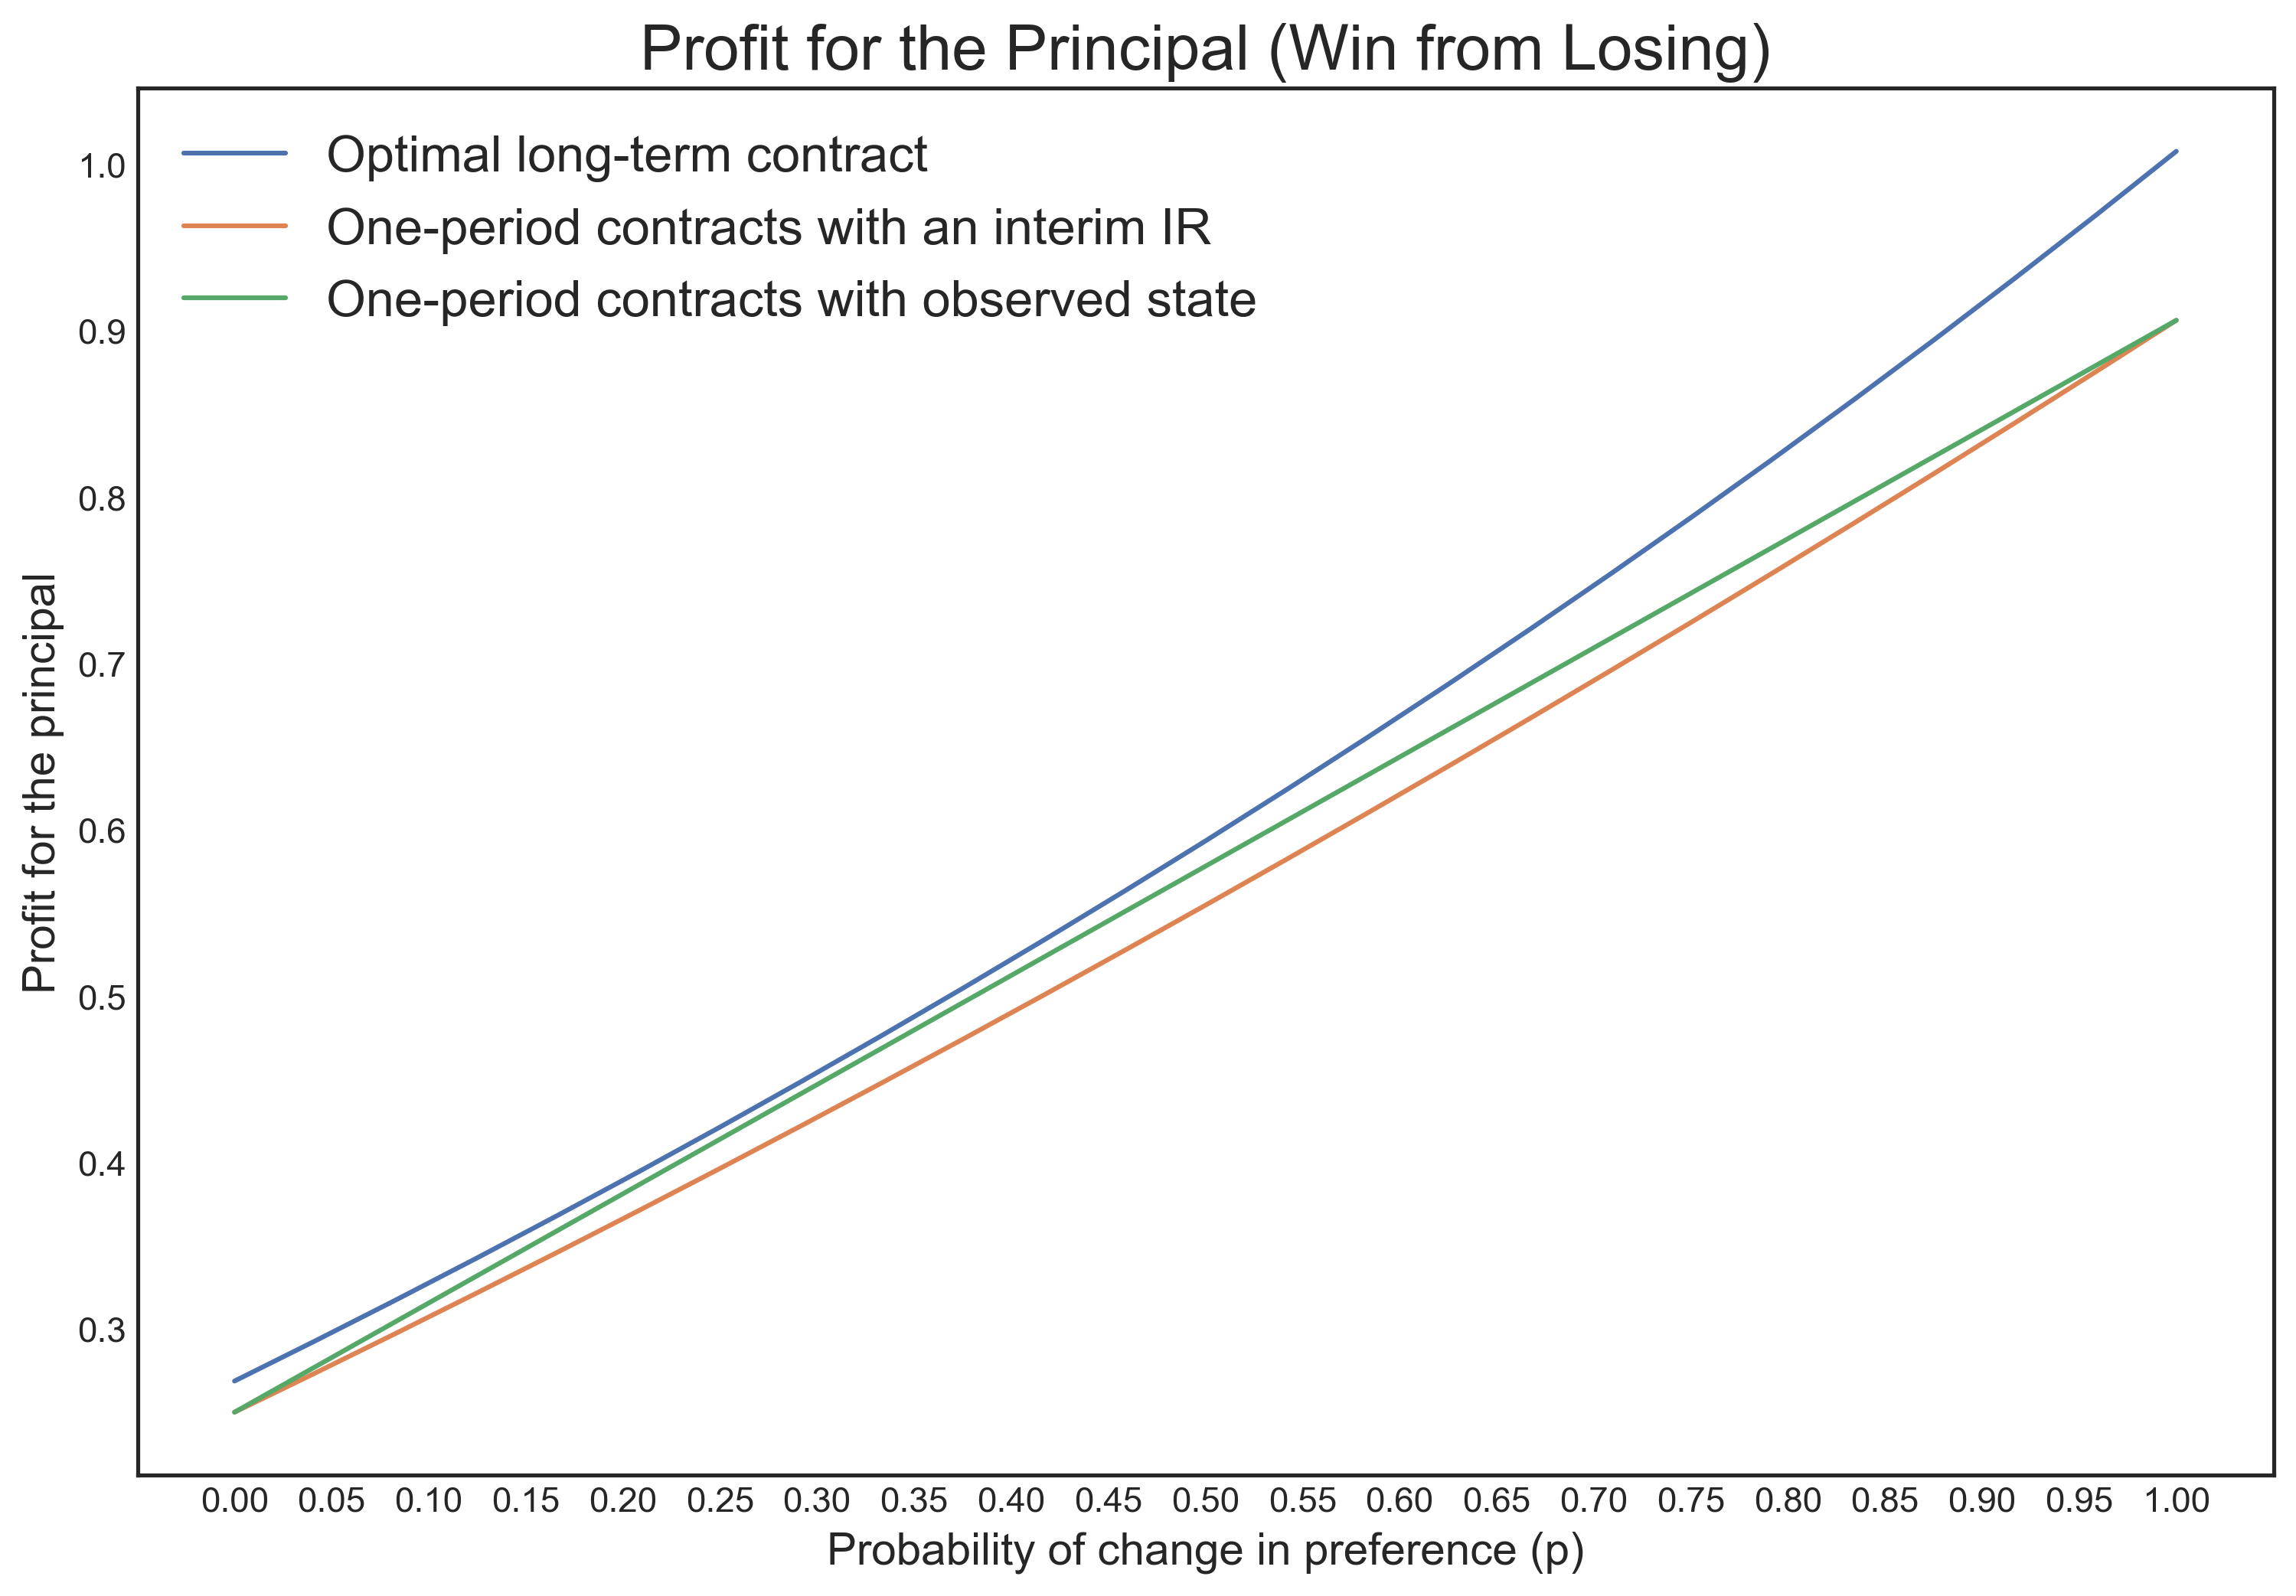

In [9]:
# Comparison of profits for the principal

# 1. Optimal long-term contract profit

profit_long = list()

# 2. One-period contracts with interim IR profit

profit_repeated_IR = list()

# 3. One-period contracts with realized state profit

profit_realized = list()

for i in range(len(p_grid)):
    e1 = e1_dep_1[i]
    e20 = e20_dep_1[i]
    e21 = e_fb
    p = p_grid[i]
    ep_sb_p = ep_sb[i]
    
    # 1. Optimal long-term contract
    
    profit_long.append(e1*(1-t_1(e1,e20, e21)+e21*(1-t_2(e21)))+(1-e1)*(e20*(1-t_2(e20))+(1-e20)*p))
    
    # 2. One-period contracts with interim IR
    
    profit_repeated_IR.append(e_sb*(1-c_e(e_sb))+e_sb*(e_sb*(1-c_e(e_sb)))+(1-e_sb)*(ep_sb_p*(1-c_e(ep_sb_p))+(1-ep_sb_p)*p))
    
    # 4. One-period contracts with realized state
    
    profit_realized.append(e_sb*(1-c_e(e_sb))+(e_sb+(1-e_sb)*(1-p))*(e_sb*(1-c_e(e_sb)))+(1-e_sb)*p)
    
    
# Plotting the profits

plt.figure(figsize=(12,8))
plt.plot(p_grid, profit_long, label = "Optimal long-term contract")
plt.plot(p_grid, profit_repeated_IR, label = "One-period contracts with an interim IR")
plt.plot(p_grid, profit_realized, label = "One-period contracts with observed state")
plt.xticks([0, 0.05, 0.10, 0.15, 0.20, 0.25, 0.30, 0.35, 0.40, 0.45, 0.50, 0.55, 0.60, 0.65, 0.70, 0.75, 0.80, 0.85, 0.90, 0.95, 1.00])
plt.legend(loc=2, prop={'size': 16})
plt.xlabel('Probability of change in preference (p)', fontname = 'Arial', fontsize = 14)
plt.ylabel('Profit for the principal', fontname='Arial', fontsize = 14)
plt.title('Profit for the Principal (Win from Losing)', fontsize = 20)
plt.show()

## 4.1 *Lose from Winning*

he principal maximizes 

$$e_1(1-t_1(1)+e_2(1)(1-t_2(1,1))+(1-e_1)(-t_1(0)+e_2(0)(1-p-t_2(0,1)))$$

subject to 

\begin{align*}
    t_1(1) \geq 0 \qquad &(LL_1) \\
    t_1(0) \geq 0 \qquad &(LL_0) \\
    t_1(1)+A(e_2(1)) = a(1) \qquad & \\
    t_1(0) + A(e_2(0)) = a(0) \qquad &\\
    a(1) - a(0) = c'(e_1) \qquad &(IC_1) \\
    t_2(y_1,1) = c'(e_2(y_1)) \qquad & (IC_2)
\end{align*}

The problem reduces to the following: 

$$ \max_{e_1, e_2(0), e_2(1), t_1(0)} e_1(1-e_2(1)^2+e_2(1))+(1-e_1)(-e_2(0)^2+e_2(0)(1-p))-2e_1^2-t_1(0)-e_2(0)^2$$

subject to 

$$t_1(0) \geq 0$$

The Lagrangian is then given by: 

$$L = e_1(1-e_2(1)^2+e_2(1))+(1-e_1)(-e_2(0)^2+e_2(0)(1-p))-2e_1^2-t_1(0)-e_2(0)^2 +\lambda (t_1(0))$$

The first-order conditions that characterize the optimal solution are: 

\begin{align*}
[e_2(1)] :\ &-2e_2(1)e_1+e_1 = 0 \implies e_2(1) = \frac{1}{2} \\
\\
[e_2(0)] :\  & -2(1-e_1)e_2(0)+(1-e_1)(1-p)-2e_2(0) = 0\\
\\
[e_1] :\ & (1+0.25)-4e_1+e_2(0)^2-e_2(0)(1-p) = 0 \\
\\
[t_1(0)]: \ &-1+\lambda = 0 \implies \lambda = 1 \implies t_1(0) = 0
\end{align*}

In [10]:
# Solves for the effort level given a value of p 

def f_dep_0(p):
    
    # solves for effort levels e_1 and e_20 as a function of p
    
    # a = e_1, b = e_20
    
    var('a b p')
    eqns = [1+0.25-4*a+b**2-b+b*p, -2*b*(1-a)+(1-a)-(1-a)*p-2*b]
    soln = solve(eqns, [a,b])
    return soln

In [11]:
# Effort levels

e1_dep_0 = list()
e20_dep_0 = list()

for i in range(len(p_grid)):
    
        # No unique solution to the simultaneous equations
        
        # We pick the real solutions between 0 and 1 below
        
        e1_dep_0.append(abs(f_dep_0(p_grid[i])[0][0]))
        e20_dep_0.append(abs(f_dep_0(p_grid[i])[0][1]))

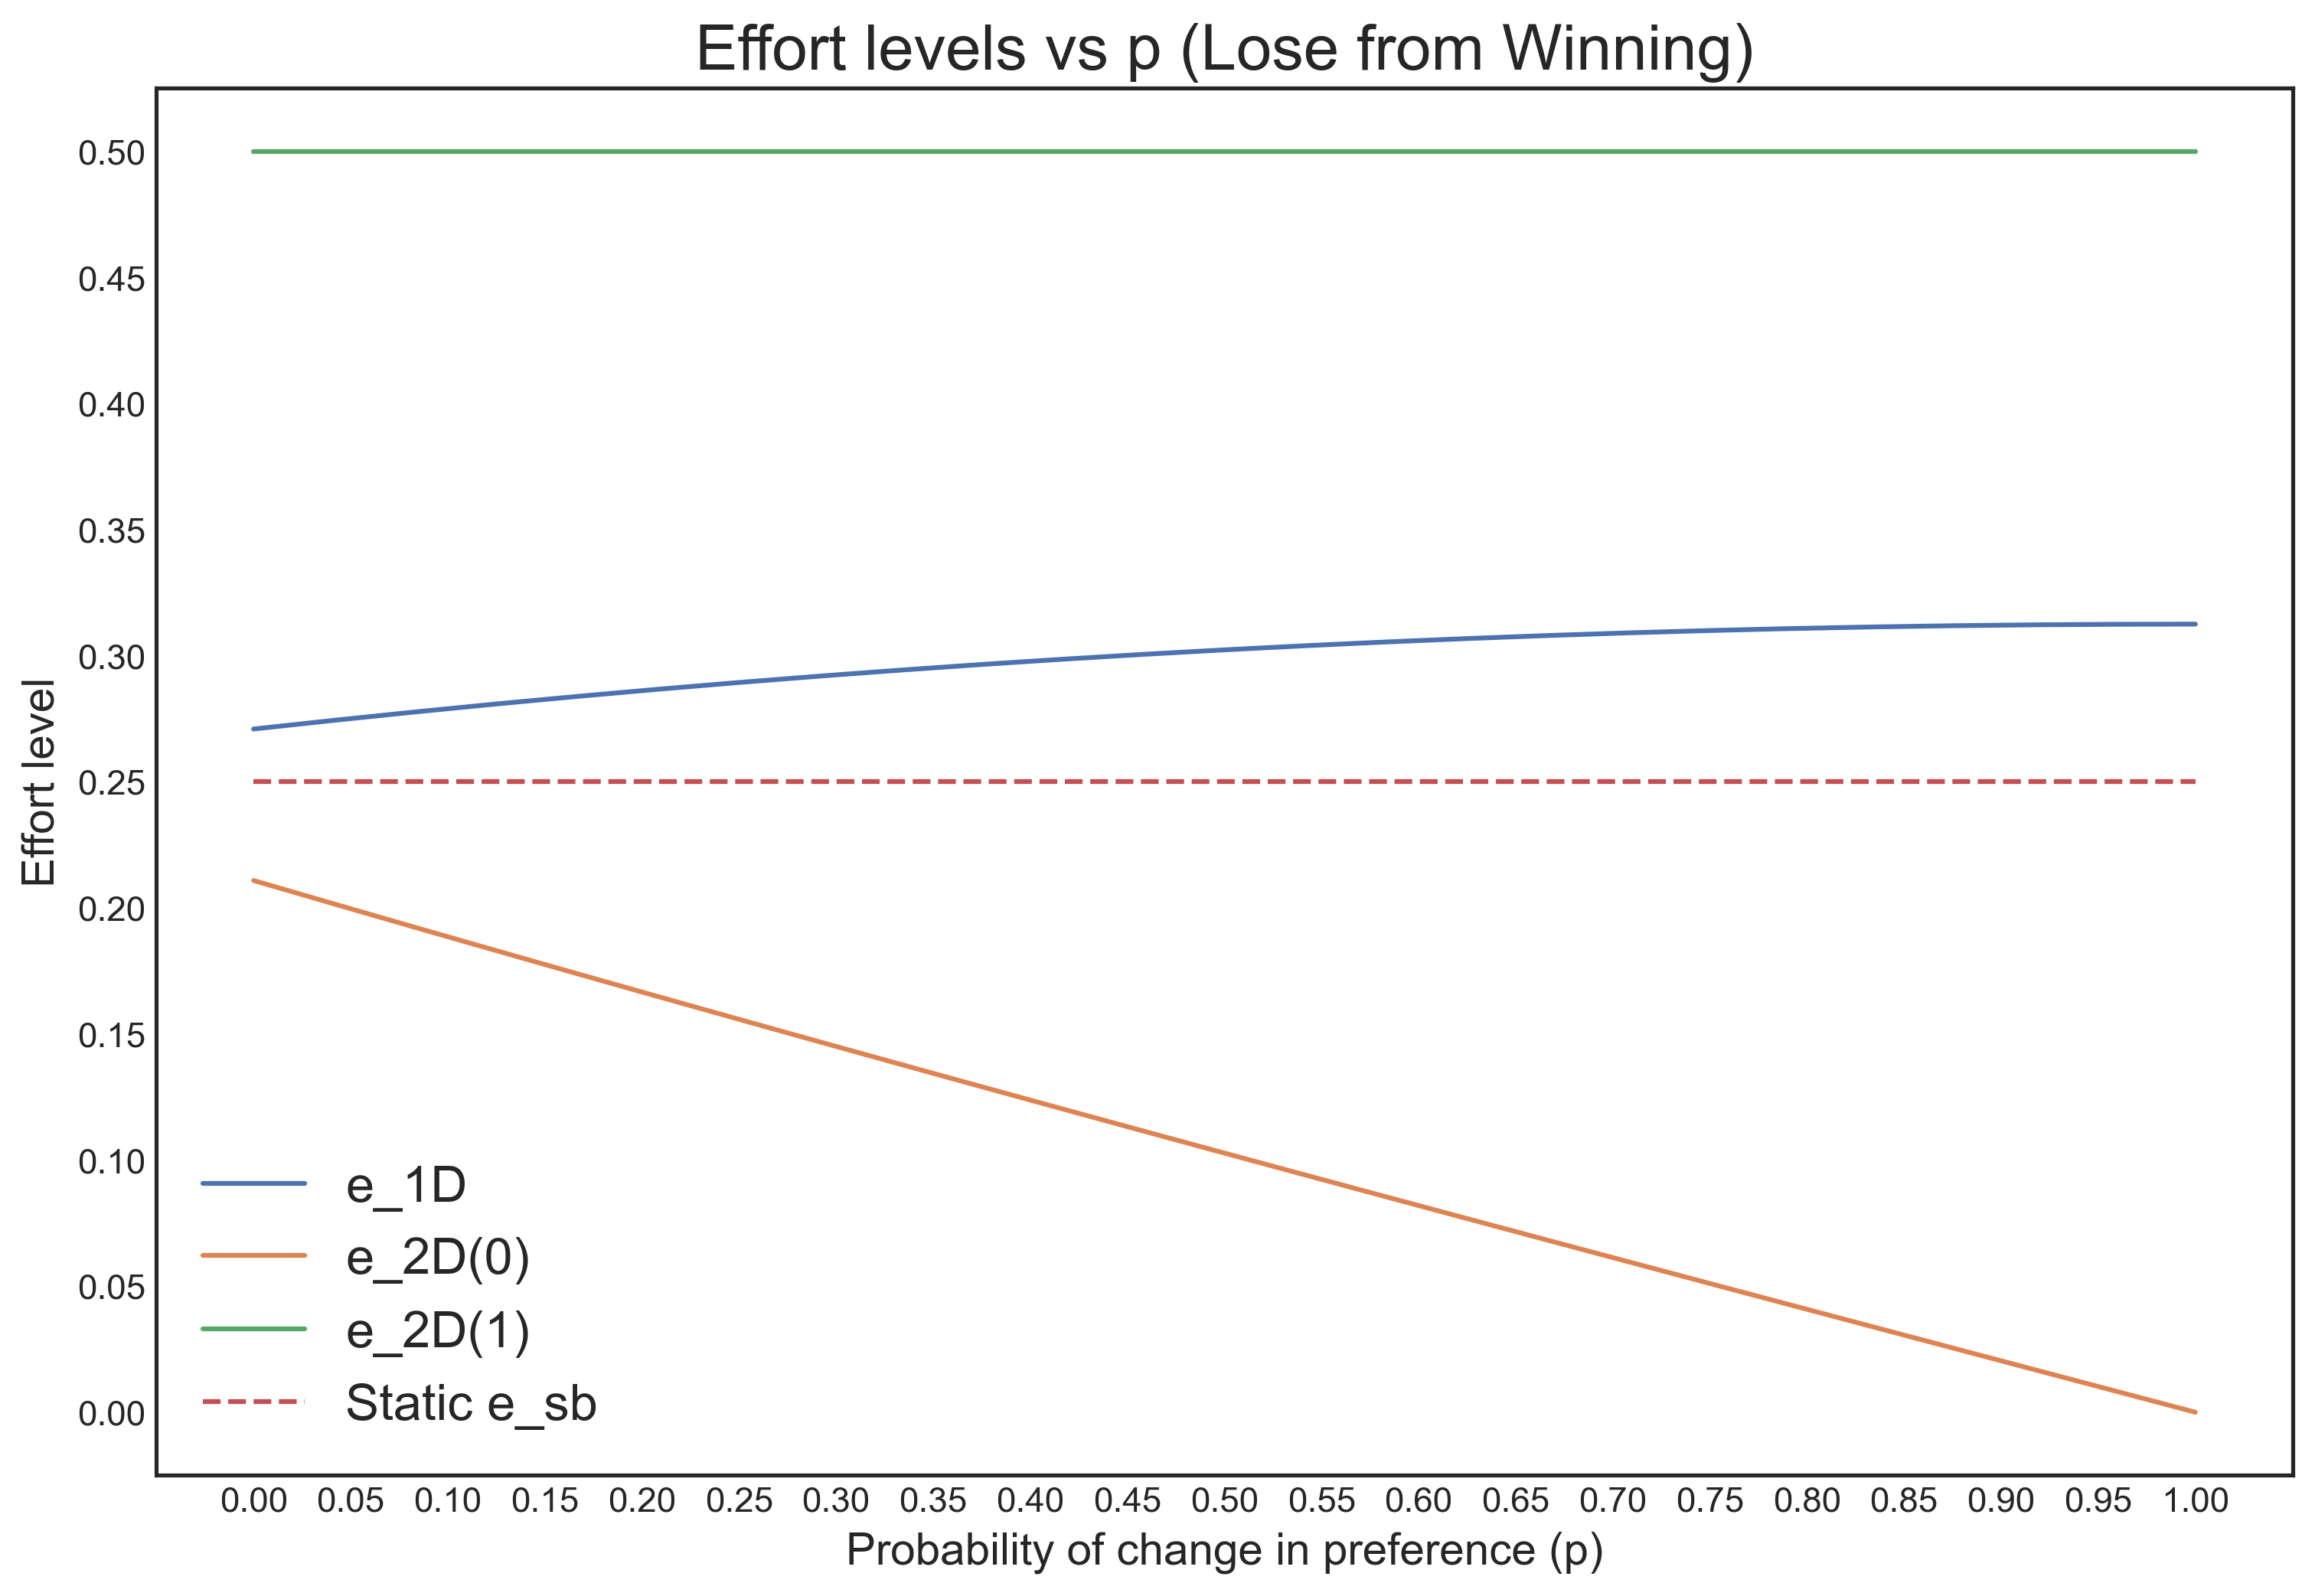

In [12]:
# Plotting the effort levels 

plt.figure(figsize=(12,8))
plt.style.use('seaborn-white')
plt.plot(p_grid, e1_dep_0, label = "e_1D")
plt.plot(p_grid, e20_dep_0, label = "e_2D(0)")
plt.plot(p_grid, [e_fb]*len(p_grid), label = "e_2D(1)")
plt.plot(p_grid, [e_sb]*len(p_grid), '--', label = "Static e_sb")
plt.xticks([0, 0.05, 0.10, 0.15, 0.20, 0.25, 0.30, 0.35, 0.40, 0.45, 0.50, 0.55, 0.60, 0.65, 0.70, 0.75, 0.80, 0.85, 0.90,0.95,1.00])
plt.yticks([0, 0.05, 0.10, 0.15, 0.20, 0.25, 0.30, 0.35, 0.40, 0.45, 0.50])
plt.legend(loc=3, prop={'size': 16})
plt.xlabel('Probability of change in preference (p)', fontname = 'Arial', fontsize = 14)
plt.ylabel('Effort level', fontname='Arial', fontsize = 14)
plt.title('Effort levels vs p (Lose from Winning)', fontsize = 20)
plt.show()


## 4.2 Change in preference independent of first-period outcome

The principal maximizes: 

$$e_1(1-t_1(1)+e_2(1)(1-t_2(1,1))+(1-e_2(1))p)+(1-e_1)(-t_1(0)+e_2(0)(1-t_2(0,1))+(1-e_2(0))p)$$

subject to 

\begin{align*}
    t_1(1) \geq 0 \qquad &(LL_1) \\
    t_1(0) \geq 0 \qquad &(LL_0) \\
    t_1(1)+A(e_2(1)) = a(1) \qquad & \\
    t_1(0) + A(e_2(0)) = a(0) \qquad &\\
    a(1) - a(0) = c'(e_1) \qquad &(IC_1) \\
    t_2(y_1,1) = c'(e_2(y_1)) \qquad & (IC_2)
\end{align*}

The problem reduces to the following: 

$$ \max_{e_1, e_2(0), e_2(1), t_1(0)} e_1-e_1e_2(1)^2+e_1e_2(1)(1-p)+e_1p+(1-e_1)(e_2(0)(1-p)-e_2(0)^2+p)-2e_1^2-t_1(0)-e_2(0)^2$$

subject to 

$$t_1(0) \geq 0$$

The Lagrangian is then given by: 

$$L = e_1-e_1e_2(1)^2+e_1e_2(1)(1-p)+e_1p+(1-e_1)(e_2(0)(1-p)-e_2(0)^2+p)-2e_1^2-t_1(0)-e_2(0)^2 +\lambda (t_1(0))$$

The first-order conditions that characterize the optimal solution are: 

\begin{align*}
[e_2(1)] :\ &-2e_2(1)e_1+e_1(1-p) = 0 \implies e_2(1) = \frac{1-p}{2} \\
\\
[e_2(0)] :\  &(1-e_1)(1-p) -2e_2(0)(1-e_1)-2e_2(0) = 0\\
\\
[e_1] :\ &1-e_2(1)^2 +e_2(1)(1-p)-e_2(0)(1-p)+e_2(0)^2-4e_1 = 0 \\
\end{align*}

In [13]:
# Solves for the effort level given a value of p 

def f_I(p):
    
    # solves for effort levels e_1 and e_20 as a function of p
    
    # a = e_1, b = e_20
    
    var('a b p')
    eqns = [1+(1-p)/2*(1-p)-((1-p)/2)**2-4*a-b*(1-p)+b**2, (1-a)*(1-p)-(4-2*a)*b]
    soln = solve(eqns, [a,b])
    return soln

In [14]:
# Effort levels

e1_grid_I = list()
e20_grid_I = list()

for i in range(len(p_grid)):
    
        # No unique solution to the simultaneous equations
        
        # We pick the real solutions between 0 and 1 below
        
        e1_grid_I.append(abs(f_I(p_grid[i])[0][0]))
        e20_grid_I.append(abs(f_I(p_grid[i])[0][1]))        

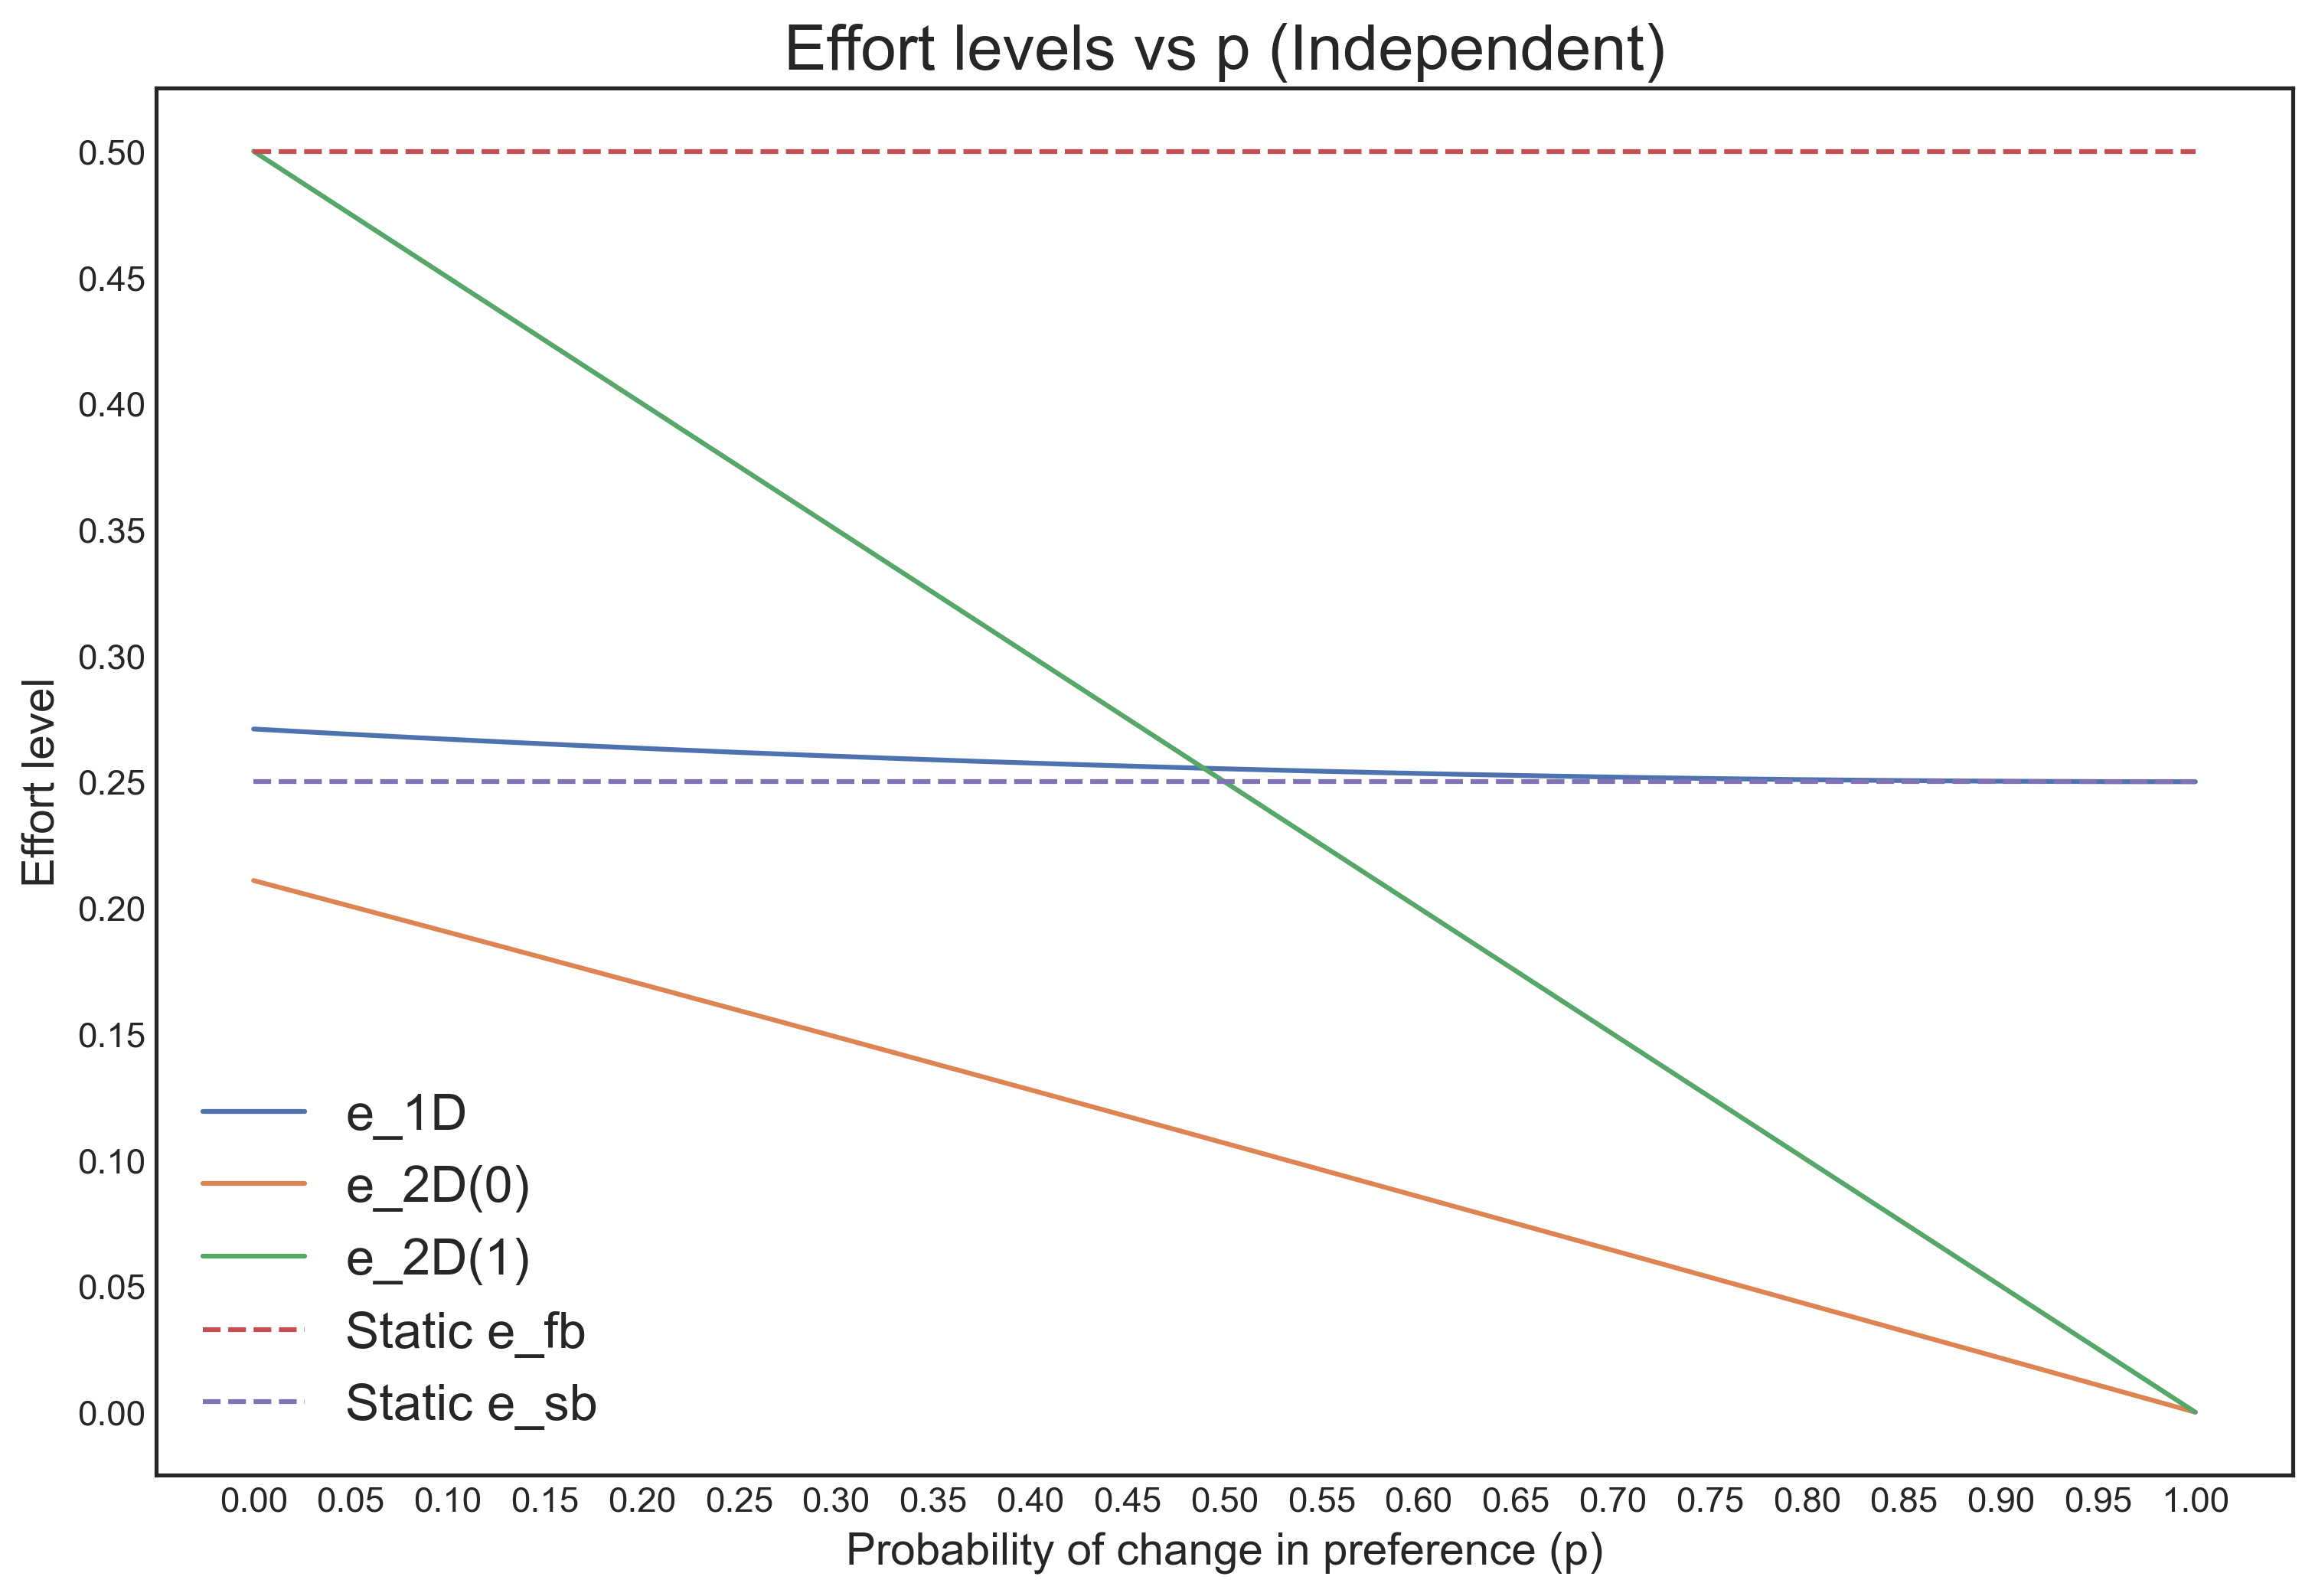

In [15]:
# Plotting the effort levels 

plt.figure(figsize=(12,8))
plt.style.use('seaborn-white')
plt.plot(p_grid, e1_grid_I, label = "e_1D")
plt.plot(p_grid, e20_grid_I, label = "e_2D(0)")
plt.plot(p_grid, ep_fb, label = "e_2D(1)")
plt.plot(p_grid, [e_fb]*len(p_grid), '--',label = "Static e_fb")
plt.plot(p_grid, [e_sb]*len(p_grid), '--',label = "Static e_sb")
plt.xticks([0, 0.05, 0.10, 0.15, 0.20, 0.25, 0.30, 0.35, 0.40, 0.45, 0.50, 0.55, 0.60, 0.65, 0.70, 0.75, 0.80, 0.85, 0.90,0.95,1.00])
plt.yticks([0, 0.05, 0.10, 0.15, 0.20, 0.25, 0.30, 0.35, 0.40, 0.45, 0.50])
plt.legend(loc=3, prop={'size': 16})
plt.xlabel('Probability of change in preference (p)', fontname = 'Arial', fontsize = 14)
plt.ylabel('Effort level', fontname='Arial', fontsize = 14)
plt.title('Effort levels vs p (Independent)', fontsize = 20)
plt.show()

## 4.3 Varying p with first-period outcome 

### *Lose from Winning*

Let $p_1$ be the probability of change in preference after a first-period success and $p_0$ be the probability of change in preference after a first-period failure with $p_0 > p_1$.

The principal maximizes: 

$$ e_1(1-t_1(1)+e_2(1)(1-p_1-t_2(1,1)))+(1-e_1)(-t_1(0)+e_2(0)(1-p_0-t_2(0,1))) $$

subject to 

\begin{align*}
    t_1(1) \geq 0 \qquad &(LL_1) \\
    t_1(0) \geq 0 \qquad &(LL_0) \\
    t_1(1)+A(e_2(1)) = a(1) \qquad & \\
    t_1(0) + A(e_2(0)) = a(0) \qquad &\\
    a(1) - a(0) = c'(e_1) \qquad &(IC_1) \\
    t_2(y_1,1) = c'(e_2(y_1)) \qquad & (IC_2)
\end{align*}

The problem reduces to the following: 

$$ \max_{e_1, e_2(0), e_2(1), t_1(0)} e_1-e_1e_2(1)^2+e_1e_2(1)(1-p_1)+(1-e_1)(e_2(0)(1-p_0)-e_2(0)^2)-2e_1^2-t_1(0)-e_2(0)^2$$

subject to 

$$t_1(0) \geq 0$$

The Lagrangian is then given by: 

$$L = e_1-e_1e_2(1)^2+e_1e_2(1)(1-p_1)+(1-e_1)(e_2(0)(1-p_0)-e_2(0)^2)-2e_1^2-t_1(0)-e_2(0)^2 + \lambda (t_1(0))$$

The first-order condtions that characterize the optimal solution are: 

\begin{align*}
[e_2(1)] :\ &-2e_2(1)e_1+e_1(1-p_1) = 0 \implies e_2(1) = \frac{1-p_1}{2} \\
\\
[e_2(0)] :\  &(1-e_1)(1-p_0) -2e_2(0)(1-e_1)-2e_2(0) = 0\\
\\
[e_1] :\ &1-e_2(1)^2 +e_2(1)(1-p_1)-e_2(0)(1-p_0)+e_2(0)^2-4e_1 = 0 \\
\\ 
[t_1(0)]: \ &-1+\lambda = 0 \implies \lambda = 1 \implies t_1(0) = 0 
\end{align*}

In [16]:
# Solves for the effort level given values of p0 and p1

def f0_q(p,q):
    
    # p = p0, q = p1
    
    e21 = (1-q)/2
    
    if np.isnan(p):
        return [[0,0]]
    
    # solves for effort levels e_1 and e_20 as a function of p and q
    
    # a = e_1, b = e_20
    
    var('a b p q')
#     eqns = [1-e21**2+e21*(1-q)-b*(1-p)+b**2-4*a+q-p, (1-a)*(1-p)-2*b*(1-a)-2*b]
    eqns = [1-e21**2+e21*(1-q)-b*(1-p)+b**2-4*a, (1-a)*(1-p)-2*b*(1-a)-2*b]
    soln = solve(eqns, [a,b])
    return soln

In [17]:
q_grid = np.linspace(0,1,25)

soln_grid_0 = np.zeros((len(p_grid), len(q_grid)))

for i in range(len(p_grid)):
    for j in range((len(q_grid))):
        q = q_grid[j]
        if p_grid[i] > q: 
            val = abs(f0_q(p_grid[i],q)[0][0])
            soln_grid_0[i,j] = val
        else: 
            soln_grid_0[i,j] = 0


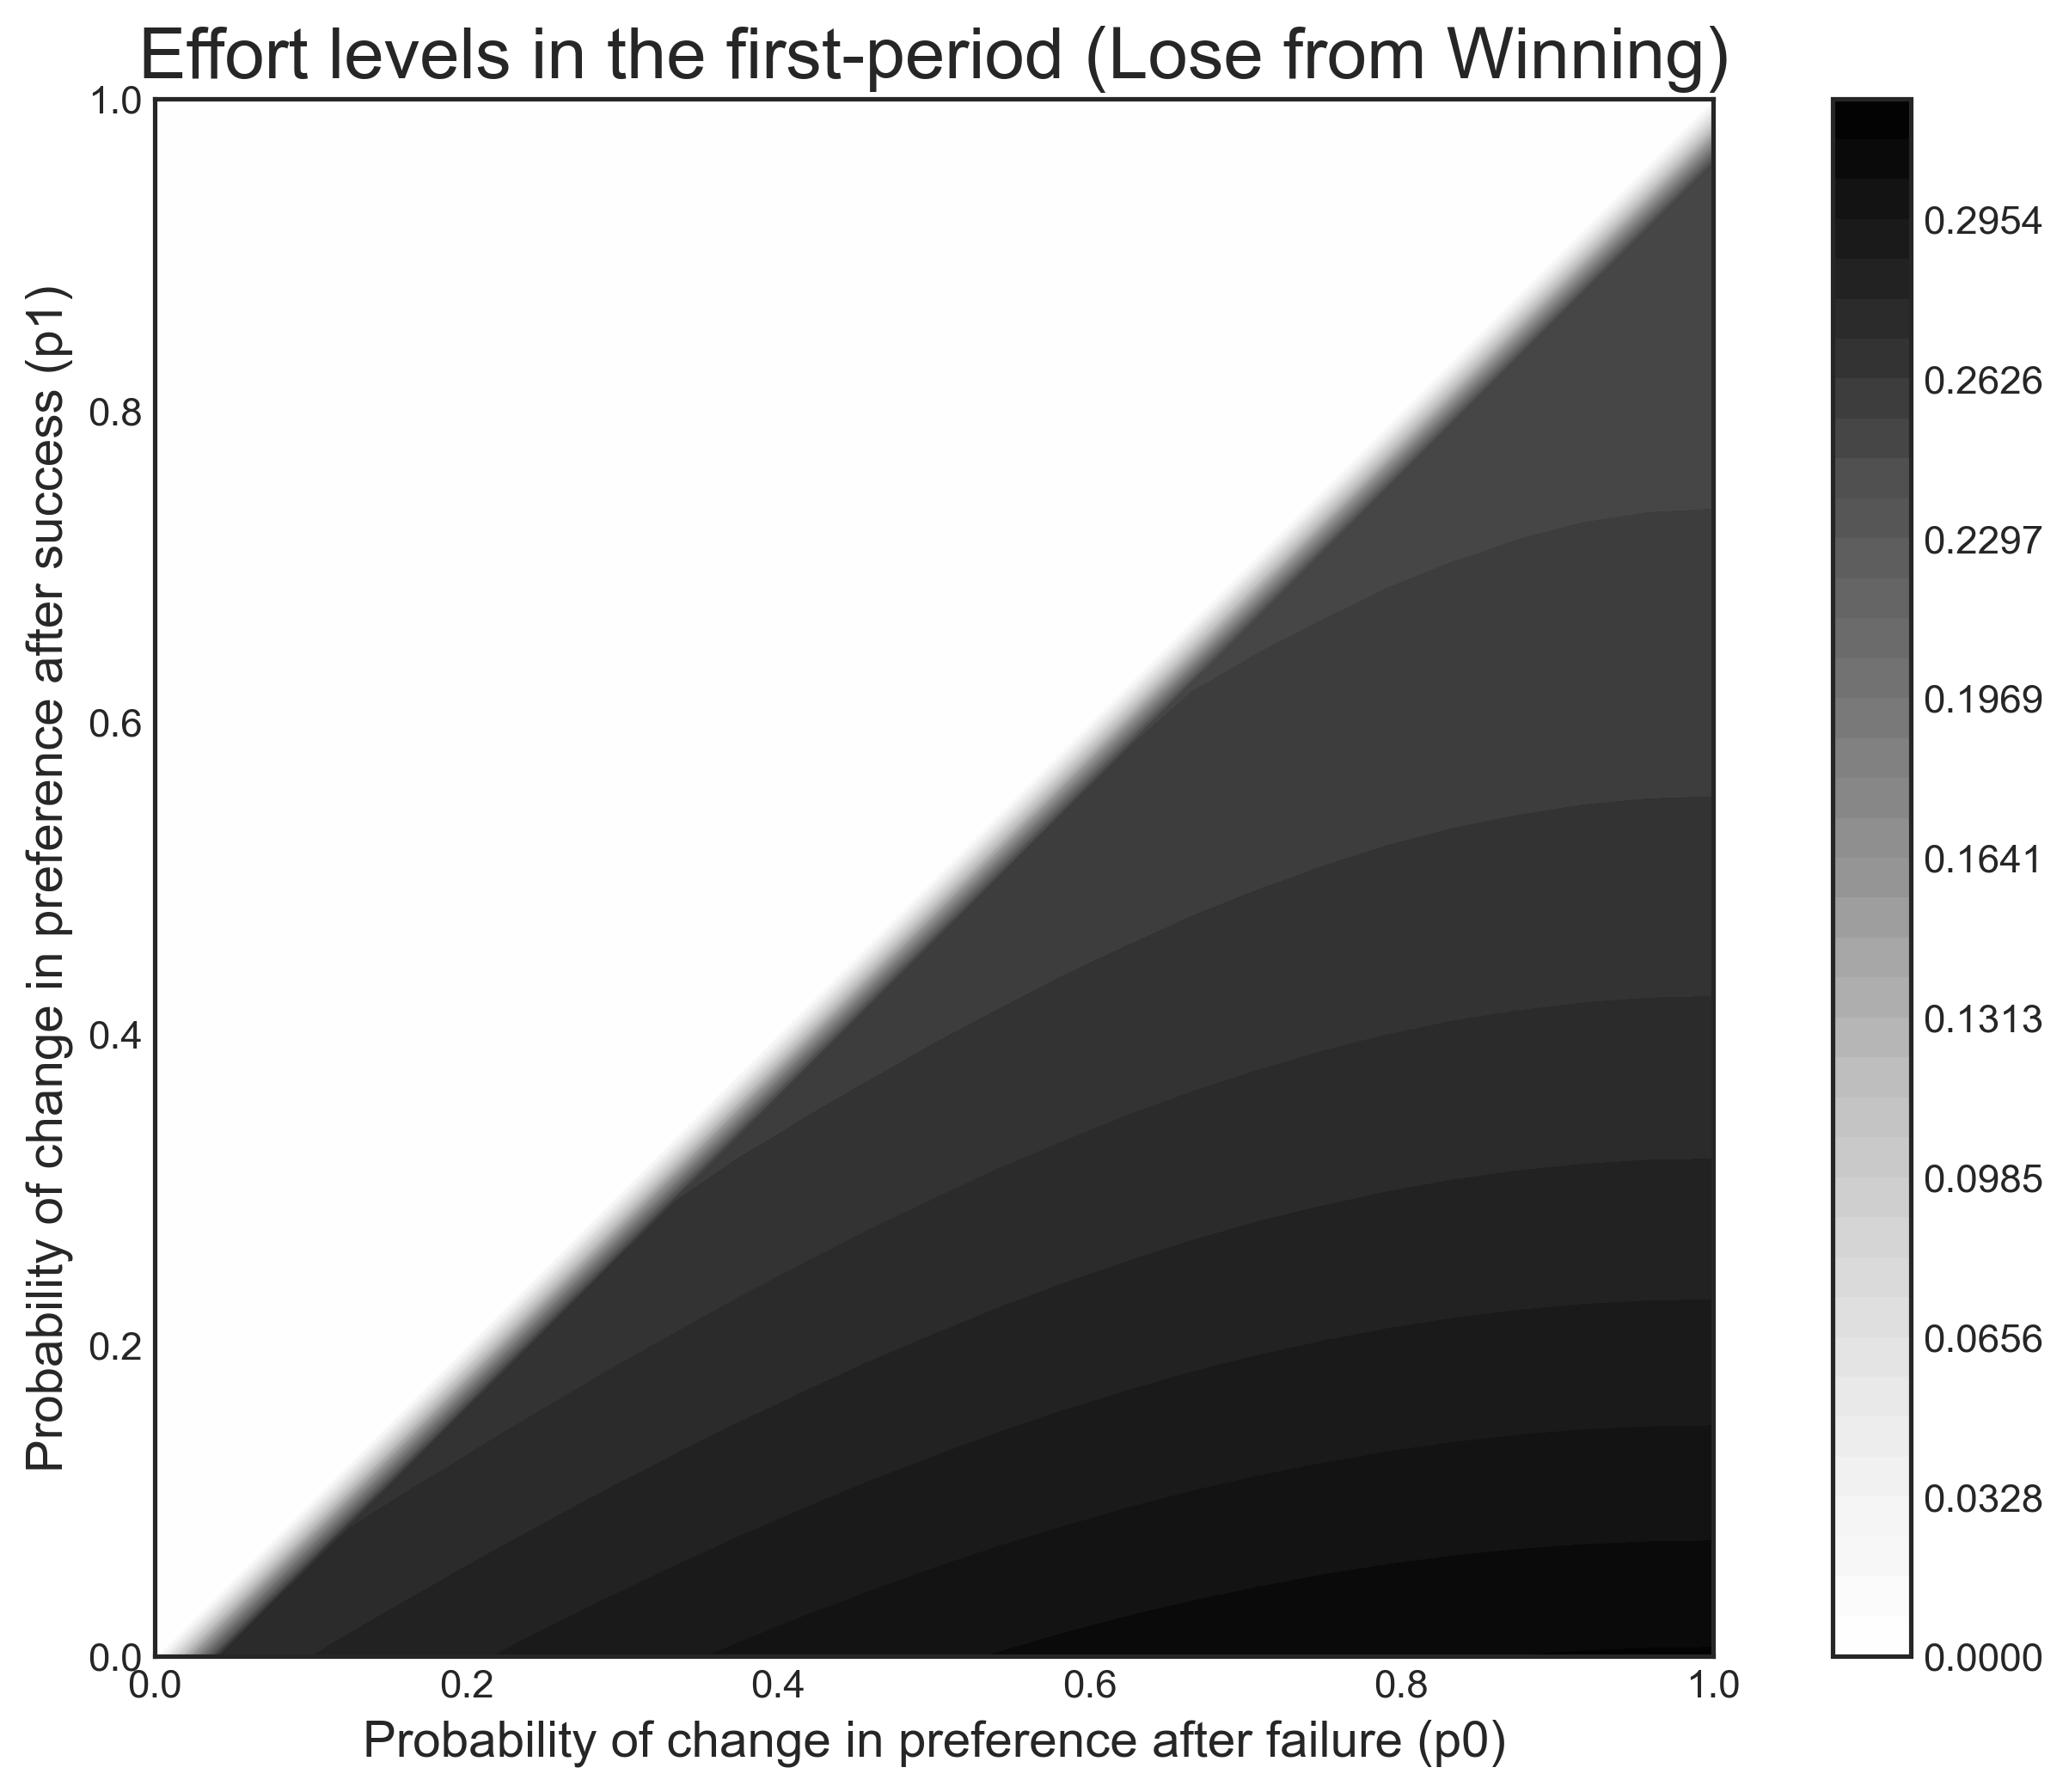

In [18]:
# Plotting the effort levels 

plt.figure(figsize=(12,8))
h = plt.contourf(p_grid,q_grid, soln_grid_0.T, levels = np.linspace(0,0.32, 40))
plt.axis('scaled')
plt.colorbar()
plt.xlabel('Probability of change in preference after failure (p0)', fontname = 'Arial', fontsize = 14)
plt.ylabel('Probability of change in preference after success (p1)', fontname = 'Arial', fontsize = 14)
plt.title('Effort levels in the first-period (Lose from Winning)', fontsize = 20)
plt.show()

### *Win From Losing*

Let $p_1$ be the probability of change in preference after a first-period success and $p_0$ be the probability of change in preference after a first-period failure with $p_0 > p_1$.

The principal maximizes: 

$$ e_1(1-t_1(1)+e_2(1)(1-p_1-t_2(1,1))+p_1)+(1-e_1)(-t_1(0)+e_2(0)(1-p_0-t_2(0,1))+p_0) $$

subject to 

\begin{align*}
    t_1(1) \geq 0 \qquad &(LL_1) \\
    t_1(0) \geq 0 \qquad &(LL_0) \\
    t_1(1)+A(e_2(1)) = a(1) \qquad & \\
    t_1(0) + A(e_2(0)) = a(0) \qquad &\\
    a(1) - a(0) = c'(e_1) \qquad &(IC_1) \\
    t_2(y_1,1) = c'(e_2(y_1)) \qquad & (IC_2)
\end{align*}

The problem reduces to the following: 

$$ \max_{e_1, e_2(0), e_2(1), t_1(0)} e_1-e_1e_2(1)^2+e_1e_2(1)(1-p_1)+(1-e_1)(e_2(0)(1-p_0)-e_2(0)^2)-2e_1^2-t_1(0)-e_2(0)^2+e_1p_1+(1-e_1)p_0$$

subject to 

$$t_1(0) \geq 0$$

The Lagrangian is then given by: 

$$L = e_1-e_1e_2(1)^2+e_1e_2(1)(1-p_1)+(1-e_1)(e_2(0)(1-p_0)-e_2(0)^2)-2e_1^2-t_1(0)-e_2(0)^2 +e_1p_1+(1-e_1)p_0+\lambda (t_1(0))$$

The first-order condtions that characterize the optimal solution are: 

\begin{align*}
[e_2(1)] :\ &-2e_2(1)e_1+e_1(1-p_1) = 0 \implies e_2(1) = \frac{1-p_1}{2} \\
\\
[e_2(0)] :\  &(1-e_1)(1-p_0) -2e_2(0)(1-e_1)-2e_2(0) = 0\\
\\
[e_1] :\ &1-e_2(1)^2 +e_2(1)(1-p_1)-e_2(0)(1-p_0)+e_2(0)^2-4e_1 + p_1-p_0 = 0 \\
\\ 
[t_1(0)]: \ &-1+\lambda = 0 \implies \lambda = 1 \implies t_1(0) = 0 
\end{align*}

In [19]:
# Solves for the effort level given values of p0 and p1

def f1_q(p,q):
    
    # p = p0, q = p1
    
    e21 = (1-q)/2
    
    if np.isnan(p):
        return [[0,0]]
    
    # solves for effort levels e_1 and e_20 as a function of p and q
    
    # a = e_1, b = e_20
    
    var('a b p q')
    eqns = [1-e21**2+e21*(1-q)-b*(1-p)+b**2-4*a+q-p, (1-a)*(1-p)-2*b*(1-a)-2*b]
    soln = solve(eqns, [a,b])
    return soln

In [20]:
soln_grid_1 = np.zeros((len(p_grid), len(q_grid)))

for i in range(len(p_grid)):
    for j in range((len(q_grid))):
        q = q_grid[j]
        if p_grid[i] > q: 
            val = abs(f1_q(p_grid[i],q)[0][0])
            soln_grid_1[i,j] = val
        else: 
            soln_grid_1[i,j] = 0

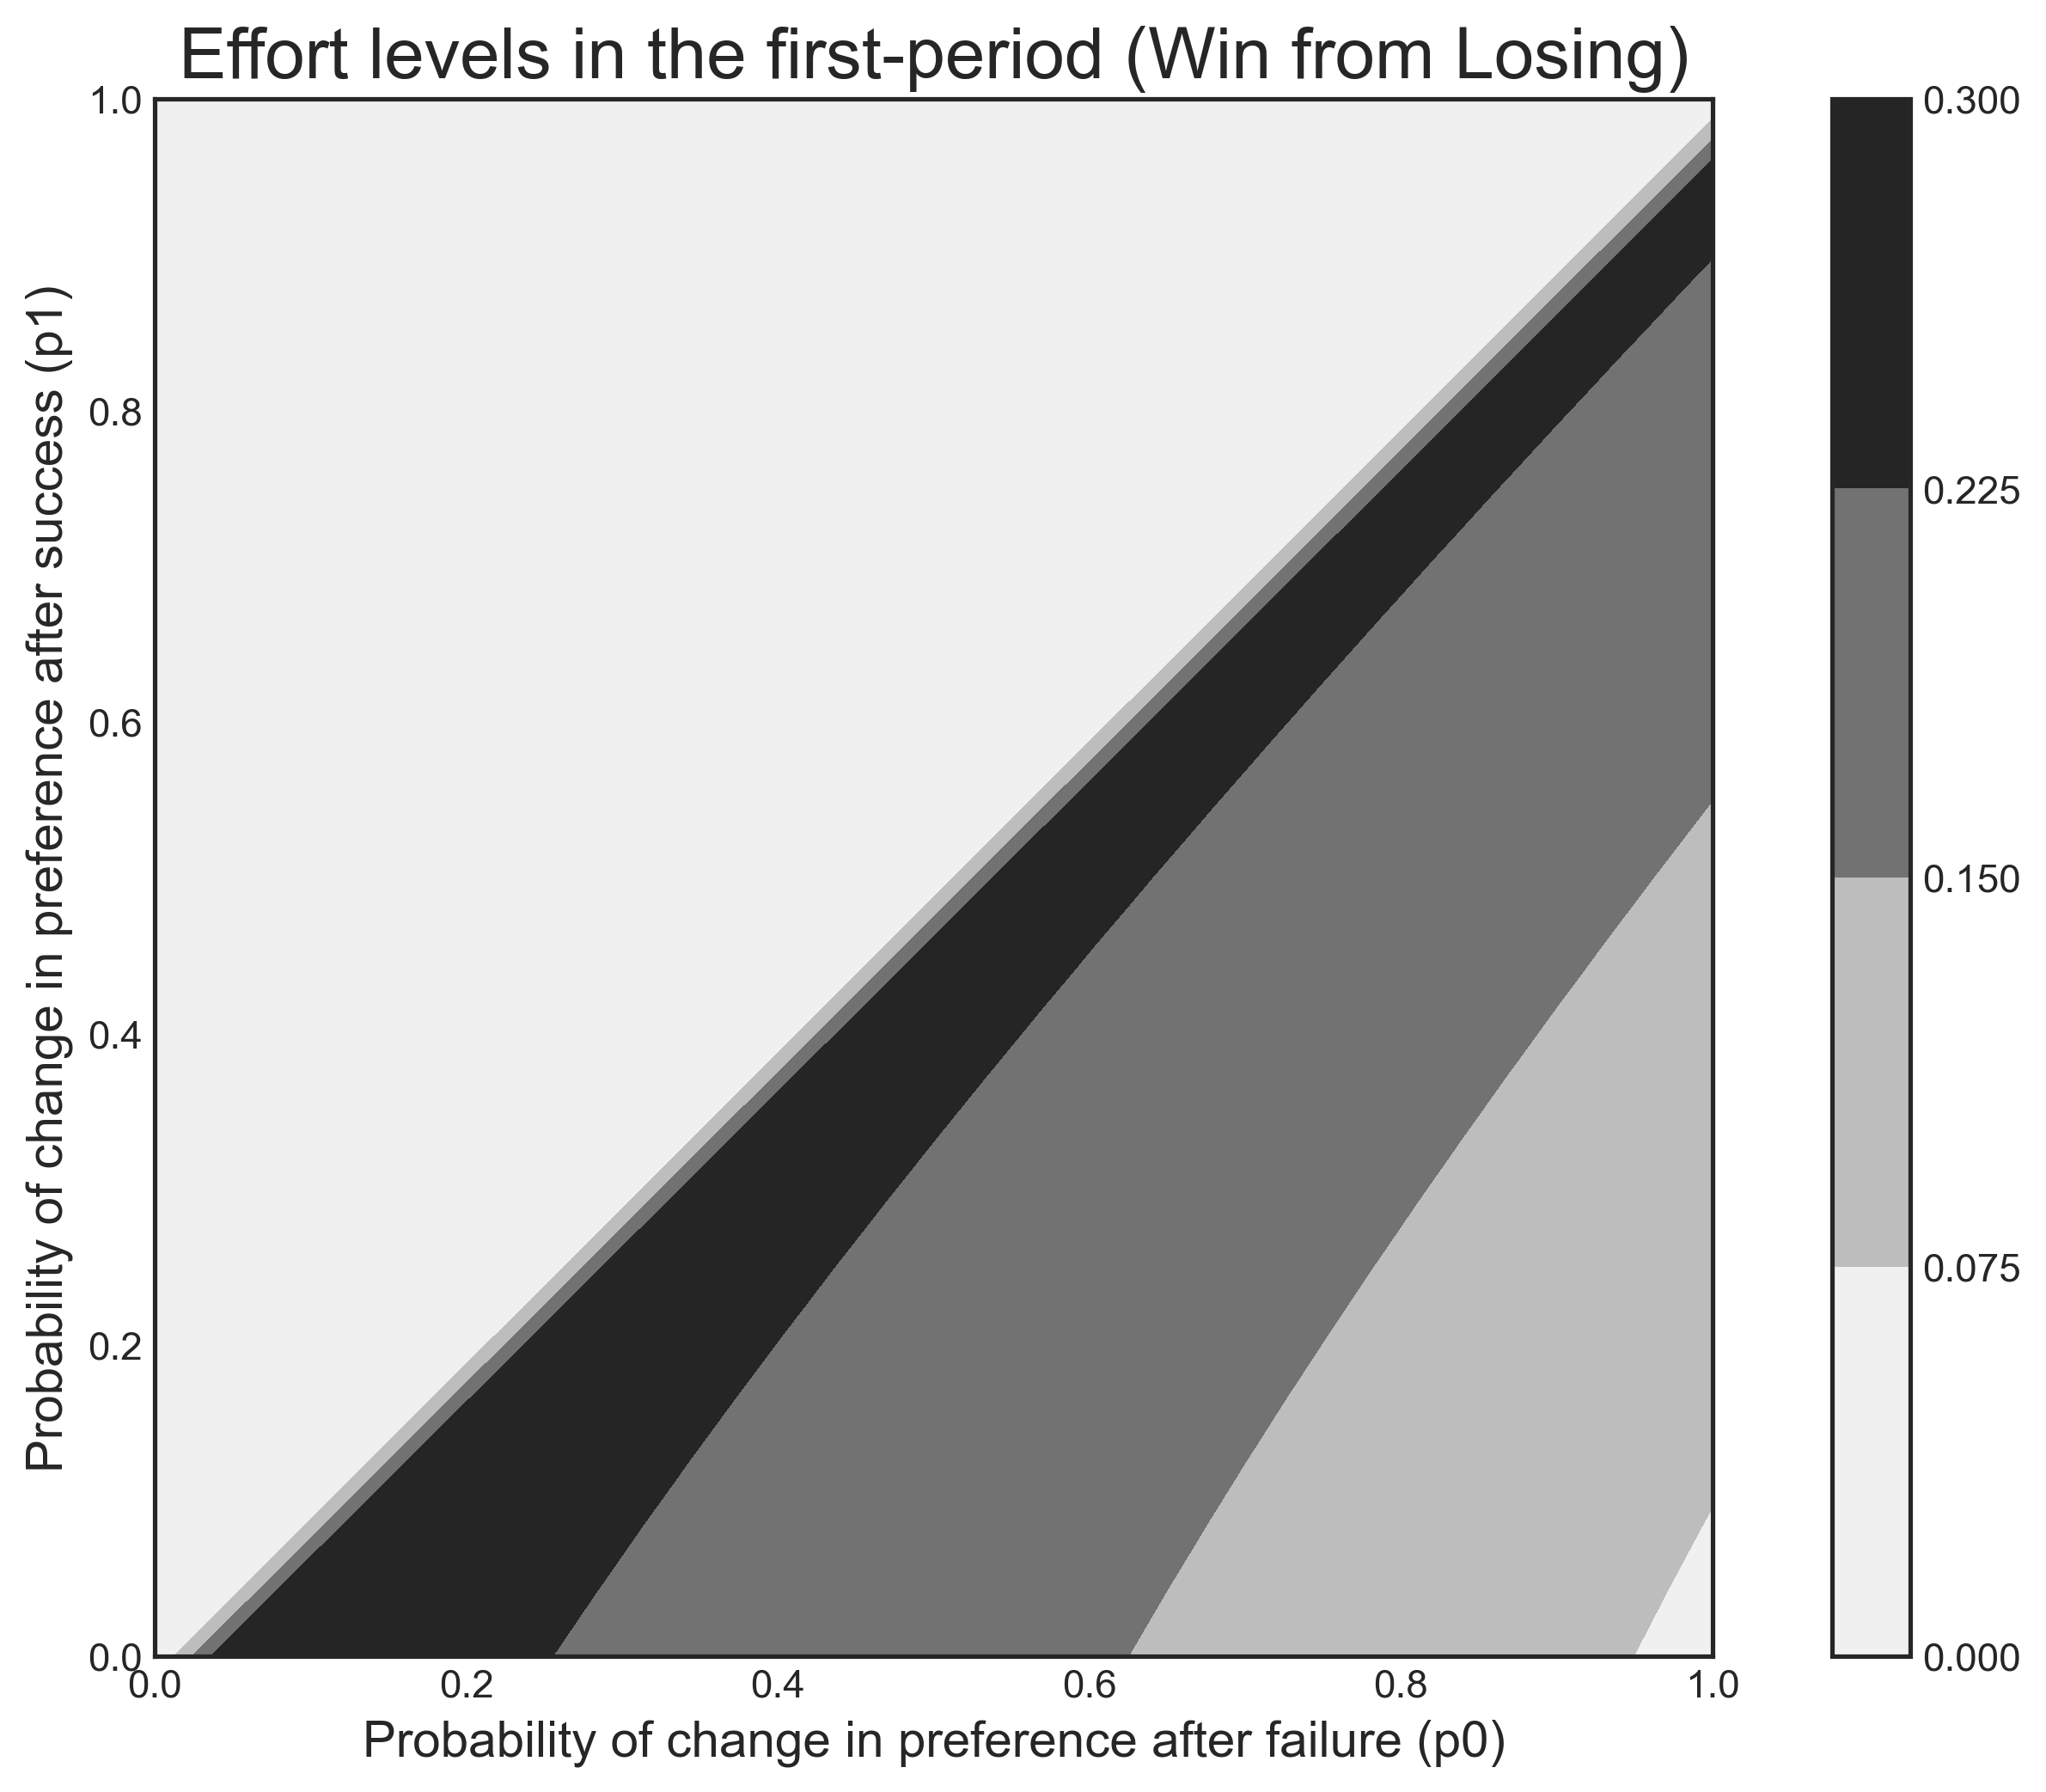

In [21]:
# Plotting the effort levels 

plt.figure(figsize=(12,8))
h = plt.contourf(p_grid,q_grid, soln_grid_1.T, levels = np.linspace(0,0.3, 5))
plt.axis('scaled')
plt.colorbar()
plt.xlabel('Probability of change in preference after failure (p0)', fontname = 'Arial', fontsize = 14)
plt.ylabel('Probability of change in preference after success (p1)', fontname = 'Arial', fontsize = 14)
plt.title('Effort levels in the first-period (Win from Losing)', fontsize = 20)
plt.show()

## 4.4 Reversed Payoffs for Success And Failure


The principal maximizes 

$$ e_1(1-t_1(1)+e_2(1)(1-t_2(1,1))+(1-e_1)(-t_1(0)+e_2(0)(1-2p-t_2(0,1))+p) $$

subject to 

\begin{align*}
    t_1(1) \geq 0 \qquad &(LL_1) \\
    t_1(0) \geq 0 \qquad &(LL_0) \\
    t_1(1)+A(e_2(1)) = a(1) \qquad & \\
    t_1(0) + A(e_2(0)) = a(0) \qquad &\\
    a(1) - a(0) = c'(e_1) \qquad &(IC_1) \\
    t_2(y_1,1) = c'(e_2(y_1)) \qquad & (IC_2)
\end{align*}

The problem reduces to the following: 

$$ \max_{e_1, e_2(0), e_2(1), t_1(0)} e_1(1-e_2(1)^2+e_2(1))+(1-e_1)(-e_2(0)^2+e_2(0)(1-2p)+p)-2e_1^2-t_1(0)-e_2(0)^2$$

subject to 

$$t_1(0) \geq 0$$

The Lagrangian is then given by: 

$$L = e_1(1-e_2(1)^2+e_2(1))+(1-e_1)(-e_2(0)^2+e_2(0)(1-2p)+p)-2e_1^2-t_1(0)-e_2(0)^2 +\lambda (t_1(0))$$

The first-order conditions that characterize the optimal solution are given by: 

\begin{align*}
[e_2(1)] :\ &-2e_2(1)e_1+e_1 = 0 \implies e_2(1) = \frac{1}{2} \\
\\
[e_2(0)] :\  & -2(1-e_1)e_2(0)+(1-e_1)(1-2p)-2e_2(0) = 0\\
\\
[e_1] :\ & (1+0.25)-4e_1+e_2(0)^2-e_2(0)(1-2p)-p = 0 \\
\\
[t_1(0)]: \ &-1+\lambda = 0 \implies \lambda = 1 \implies t_1(0) = 0
\end{align*}

In [22]:
# Solves for the effort level given a value of p 

def f_dep_rev(p):
    
    # solves for effort levels e_1 and e_20 as a function of p
    
    # a = e_1, b = e_20
    
    var('a b p')
    eqns = [1+0.25-4*a+b**2-b*(1-2*p)-p, -2*b*(1-a)+(1-a)*(1-2*p)-2*b]
    soln = solve(eqns, [a,b])
    return soln

In [23]:
# Effort levels

e1_dep_rev = list()
e20_dep_rev = list()

e1_dep_1 = list()
e20_dep_1 = list()


# New probability grid restricted till p = 0.5

p_grid_2 = np.linspace(0,0.5, 25)

for i in range(len(p_grid_2)):
    
        # No unique solution to the simultaneous equations
        
        # We pick the real solutions between 0 and 1 below
        
        e1_dep_rev.append(abs(f_dep_rev(p_grid_2[i])[0][0]))
        e20_dep_rev.append(abs(f_dep_rev(p_grid_2[i])[0][1]))   
        e1_dep_1.append(abs(f_dep_1(p_grid_2[i])[0][0]))
        e20_dep_1.append(abs(f_dep_1(p_grid_2[i])[0][1]))   

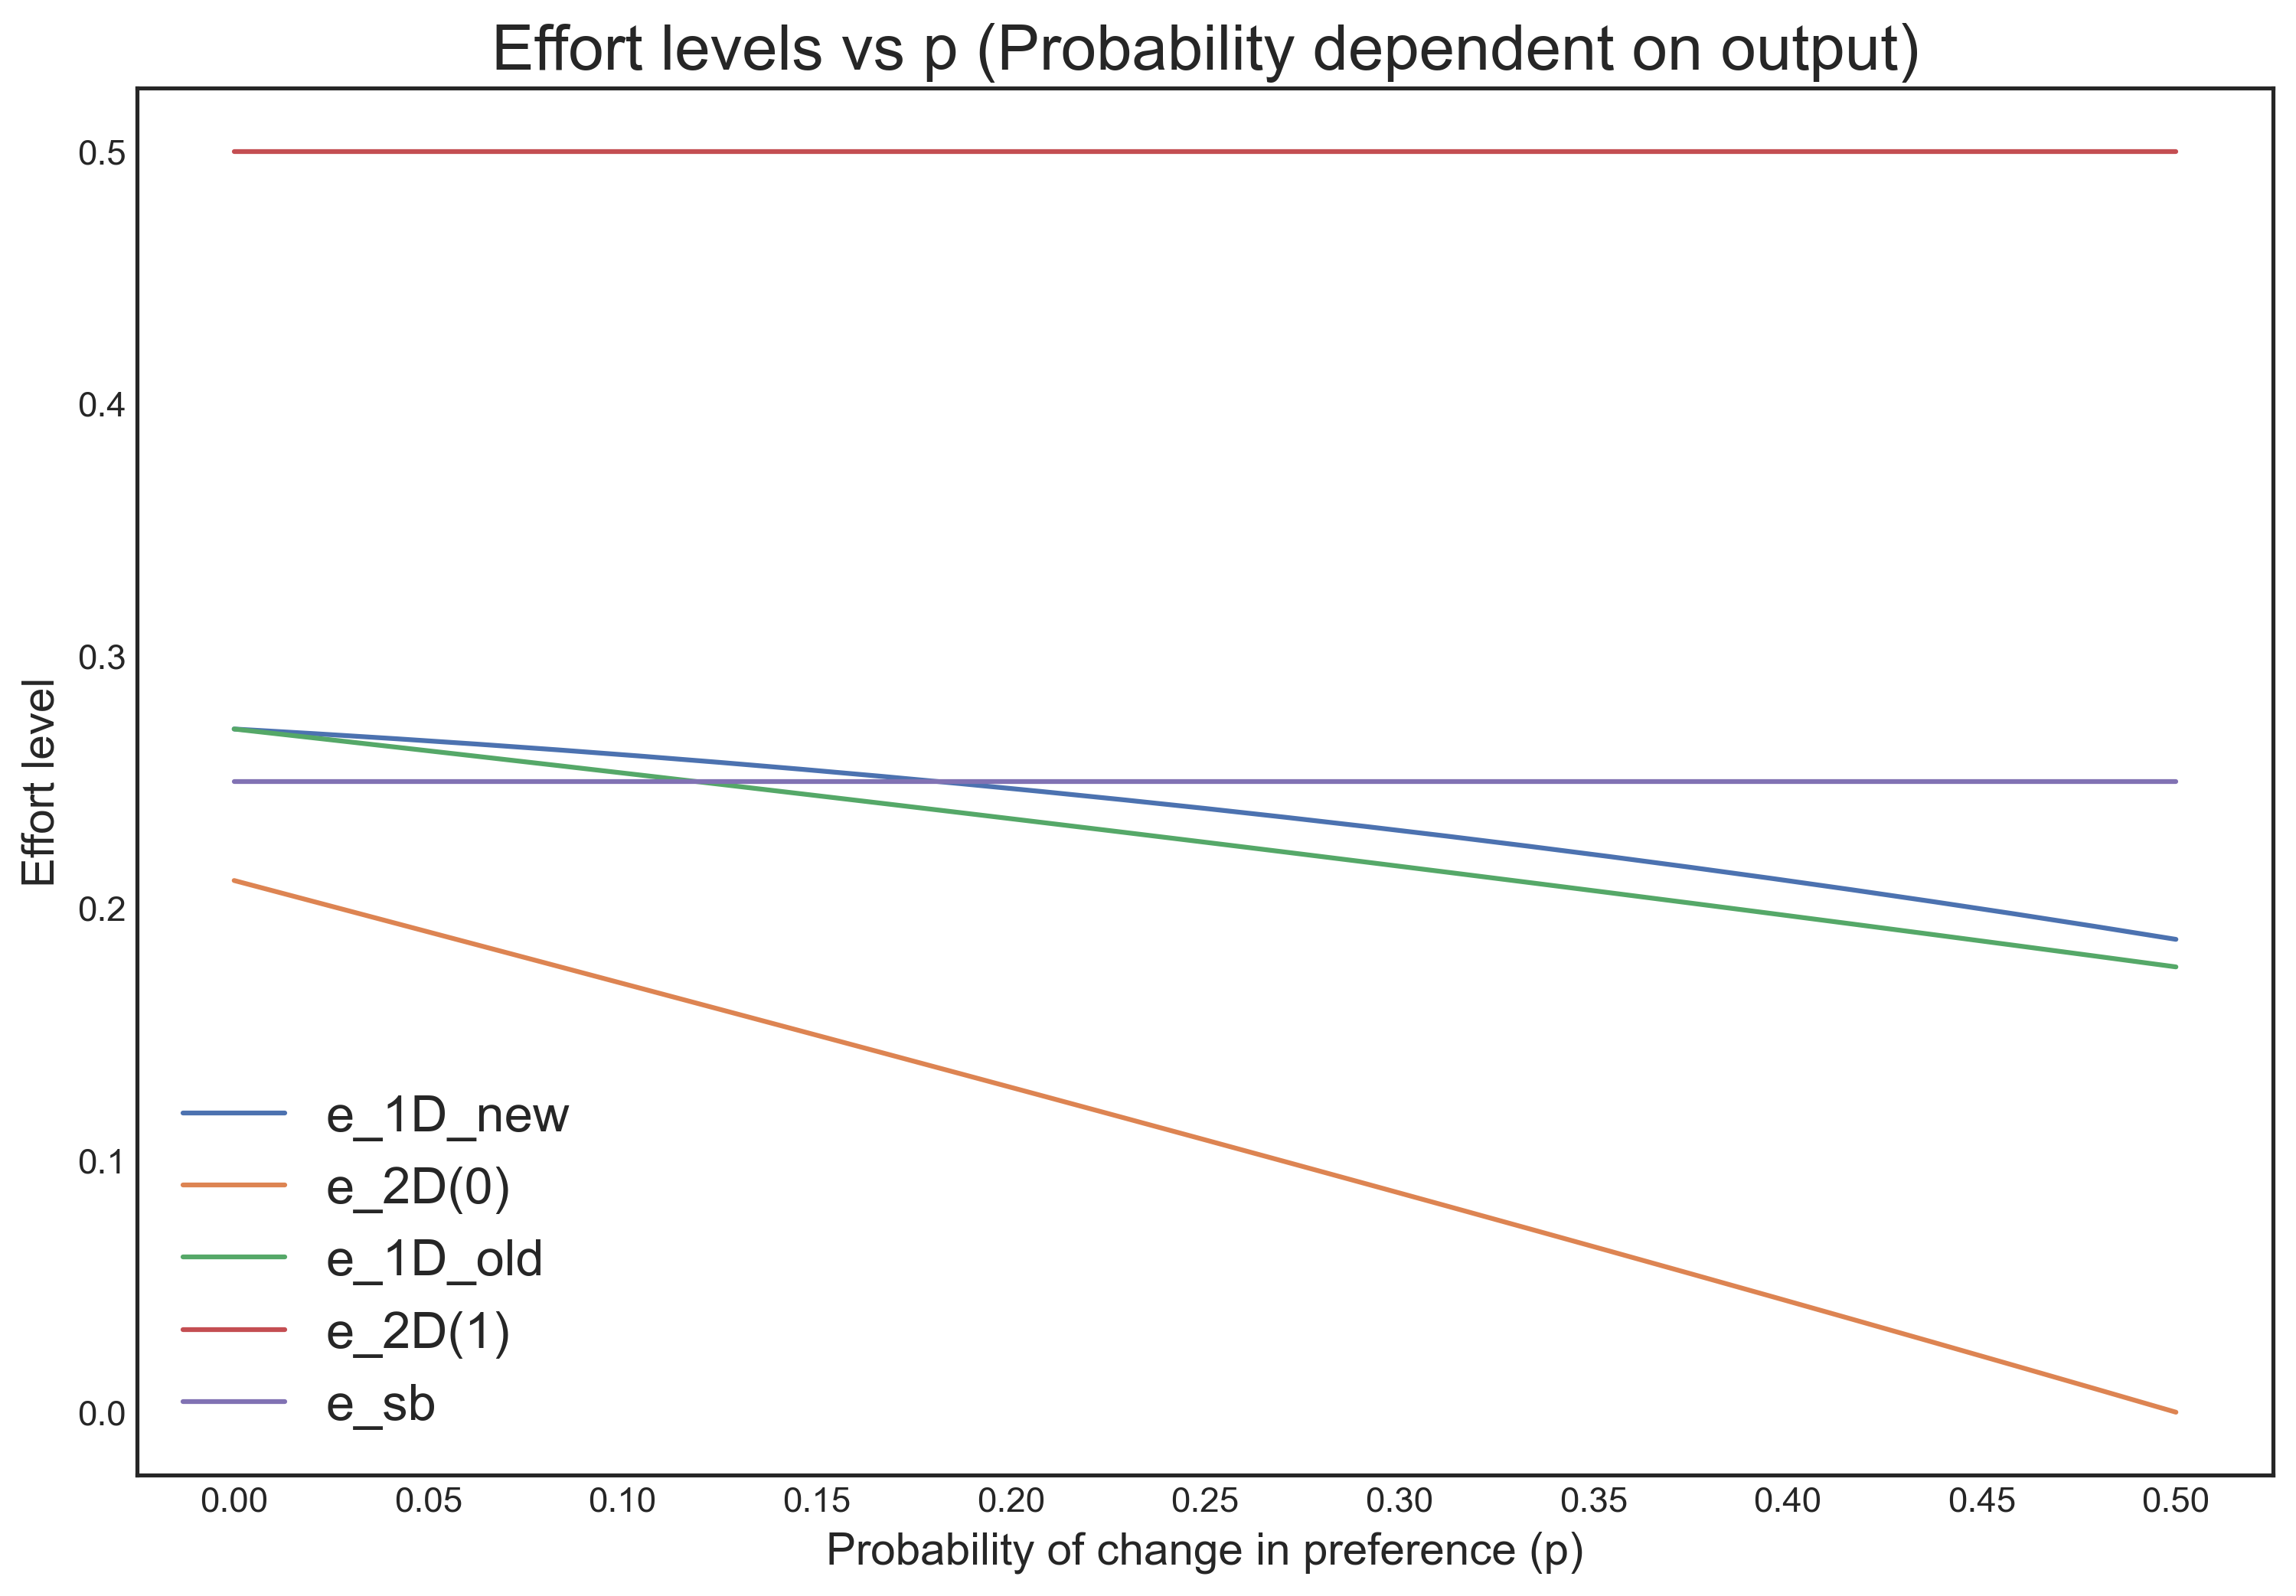

In [24]:
# Plotting the effort levels 

plt.figure(figsize=(12,8))
plt.plot(p_grid_2, e1_dep_rev, label = "e_1D_new")
plt.plot(p_grid_2, e20_dep_rev, label = "e_2D(0)")
plt.plot(p_grid_2, e1_dep_1, label = "e_1D_old")
plt.plot(p_grid_2, [e_fb]*len(p_grid_2), label = "e_2D(1)")
plt.plot(p_grid_2, [e_sb]*len(p_grid_2), label = "e_sb")
plt.xticks([0, 0.05, 0.10, 0.15, 0.20, 0.25, 0.30, 0.35, 0.40, 0.45, 0.50])
plt.legend(loc=3, prop={'size': 16})
plt.xlabel('Probability of change in preference (p)', fontname = 'Arial', fontsize = 14)
plt.ylabel('Effort level', fontname = 'Arial', fontsize = 14)
plt.title('Effort levels vs p (Probability dependent on output)', fontsize = 20)
plt.show()